# CLUSTERING PROJECT : WINE QUALITY 
## <Span style= 'color: #800020'>EXPLORATION NOTEBOOK
* By Annie Carter
* Sourced: Data World

In [68]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os

# Exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

#Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## <Span style= 'color: #800020'>AQCUIRE AND PREPARE

In [2]:
df_red = pd.read_csv('https://query.data.world/s/cjdbzy2v64s7prdtjzqbpycvvmar5c?dws=00000')

df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

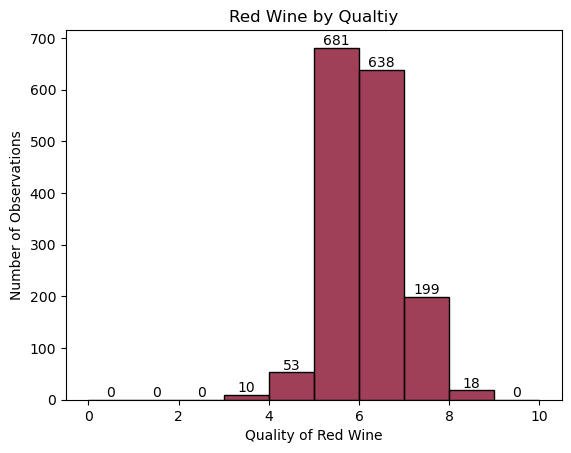

In [3]:
def red_wine():
    '''Red wine graph''' 
    rw = sns.histplot(data=df_red, x='quality', color='#800020', edgecolor='black', bins=range(11), kde=False)
    
    # Set the x-axis label and y-axis label
    plt.xlabel('Quality of Red Wine')
    plt.ylabel('Number of Observations')
    plt.title('Red Wine by Qualtiy')
    
    # Add count numbers on bars
    for p in rw.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        offset = width * 0.02  # Adjust the offset percentage as needed
        rw.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()
red_wine() 

In [4]:
df_white = pd.read_csv('https://query.data.world/s/mymzmddiphbb65cotvuinb2pgyzamt?dws=00000')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

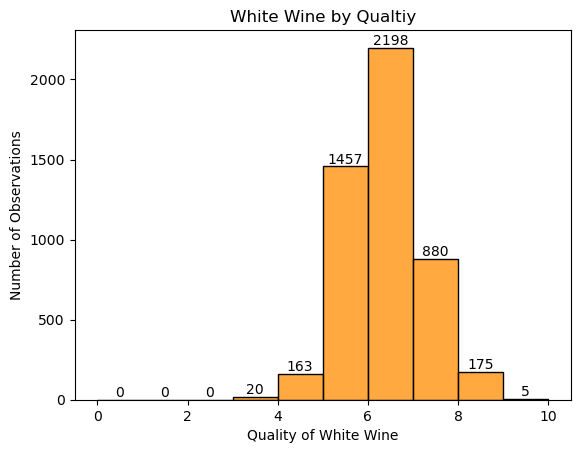

In [95]:
def white_wine():
    ww = sns.histplot(data=df_white, x='quality', color='#FF8C00', edgecolor='black', bins=range(11), kde=False)
    
    # Set the x-axis label and y-axis label
    plt.xlabel('Quality of White Wine')
    plt.ylabel('Number of Observations')
    plt.title('White Wine by Qualtiy')
    for p in ww.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()    
        offset = width * 0.02  # Adjust the offset percentage as needed
        ww.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()
    
white_wine()    

#### Takeaway: White wine  outperforms red wine in quality observations

Concat data

In [6]:
df_red['type'] = 'red'

In [7]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [8]:
df_white['type'] = 'white'

In [9]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [10]:
frames = [df_white, df_red]

In [11]:
df_wine = pd.concat(frames)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [12]:
df_red.shape

(1599, 13)

In [14]:
df_white.shape

(4898, 13)

In [13]:
df_wine.shape

(6497, 13)

In [15]:
wine_sample = (df_wine.sample(1000))

In [16]:
wine_sample.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2160            6.0             0.330         0.38             9.7      0.040   
846             6.6             0.220         0.37            15.4      0.035   
4383            6.5             0.130         0.27             2.6      0.035   
2151            7.7             0.280         0.35            15.3      0.056   
3304            6.0             0.320         0.30             1.9      0.033   
296            10.6             0.830         0.37             2.6      0.086   
2950            6.0             0.280         0.25             1.8      0.042   
1500            7.5             0.725         0.04             1.5      0.076   
804             7.3             0.320         0.34             6.6      0.032   
1225            9.2             0.460         0.23             2.6      0.091   
3153            5.8             0.290         0.33             3.7      0.029   
866             6.9             0.180         0.36             1.3      0.036   
3294            7.3             0.250         0.28             1.5      0.043   
277             7.7             0.260         0.40             1.1      0.042   
4877            5.9             0.540         0.00             0.8      0.032   
913             5.8             0.290         0.05             0.8      0.038   
1942            8.3             0.360         0.57            15.0      0.052   
770             6.8             0.120         0.31             5.2      0.045   
4354            6.4             0.310         0.27             7.4      0.049   
4310            5.6             0.225         0.24             9.8      0.054   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2160                 29.0                 124.0  0.99540  3.47       0.48   
846                  62.0                 153.0  0.99845  3.02       0.40   
4383                 32.0                  76.0  0.99140  3.21       0.76   
2151                 31.0                 117.0  0.99980  3.27       0.50   
3304                 41.0                 142.0  0.98912  3.29       0.42   
296                  26.0                  70.0  0.99810  3.16       0.52   
2950                  8.0                 108.0  0.99290  3.08       0.55   
1500                  8.0                  15.0  0.99508  3.26       0.53   
804                  24.0                 112.0  0.99505  3.22       0.46   
1225                 18.0                  77.0  0.99922  3.15       0.51   
3153                 30.0                  88.0  0.98994  3.25       0.42   
866                  40.0                 117.0  0.99340  3.27       0.95   
3294                 19.0                 113.0  0.99338  3.38       0.56   
277                   9.0                  60.0  0.99150  2.89       0.50   
4877                 12.0                  82.0  0.99286  3.25       0.36   
913                  11.0                  30.0  0.99240  3.36       0.35   
1942                 35.0                 256.0  1.00010  2.93       0.64   
770                  29.0                 120.0  0.99420  3.41       0.46   
4354                 48.0                 169.0  0.99323  3.27       0.45   
4310                 59.0                 140.0  0.99545  3.17       0.39   

        alcohol  quality   type  
2160  11.000000        6  white  
846    9.300000        5  white  
4383  11.333333        6  white  
2151   9.600000        5  white  
3304  12.800000        7  white  
296    9.900000        5    red  
2950   9.000000        5  white  
1500   9.600000        5    red  
804    9.800000        6  white  
1225   9.400000        5    red  
3153  12.300000        6  white  
866    9.500000        7  white  
3294  10.100000        6  white  
277   10.600000        5  white  
4877   8.800000        5  white  
913    9.200000        5  white  
1942   8.600000        5  white  
770    9.800000        7  white  
4354  11.100000        6  white  
4310  

In [17]:
wine_corr = df_wine.corr()['quality'].sort_values(ascending=False)
wine_corr

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Feature observation correlated that ETOH associated with good quality and  chlorides, volatile acidity, and density associated with poor quality wines.

In [18]:
df_wine.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality   type  
0       False    False  False  
1       False    False  False  
2       False    False  False  
3       False    False  False  
4       False    False  False  
...       ...      ...    ...  
1594    False    False  False  
1595    False    False  False  
1596    False    False  False  
1597    False    False  False  
1598    False    False  False  

[6497 rows x 13 columns]

In [96]:
def get_wine_data():
    '''This function creates a csv for concat wine csv'''
    # Assuming you have a function 'get_wine()' that retrieves the wine data and returns a DataFrame
    df_wine2 = df_wine

    # Save the DataFrame to a CSV file
    df_wine.to_csv("wine.csv", index=False)  # Specify 'index=False' to exclude the index column in the CSV

    filename = 'wine.csv'
    if os.path.isfile(filename):
        return pd.read_csv(filename)

get_wine_data()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   type  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
6492     10.5        5    red  
6493     11.2        6    red  
6494     11.0        6    red  
6495     10.2        5    red  
6496     11.0        6    red  

[6497 rows x 13 columns]

In [20]:
df_wine.shape

(6497, 13)

Make df_wine.csv

In [21]:
def hot_wine():
    # Create one-hot encoding for the "type" column
    wine_type_df = pd.get_dummies(df_wine['type'],  prefix='Yes', drop_first=True)
    
    # Concatenate the DataFrames df and wine_type_df
    wine_df = pd.concat([df_wine, wine_type_df], axis=1)
    # Drop the original 'type' column
    wine_df.drop(columns=['type'], inplace=True)
    
    #Make Yes_wine data type int
    wine_df['Yes_white'] = wine_df['Yes_white'].astype(int)
    return wine_df
hot_wine()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  Yes_white  
0         8.8        6          1  
1         9.5        6          1  
2        10.1        6          1  
3         9.9        6          1  
4         9.9        6          1  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[6497 rows x 13 columns]

In [22]:
wine_df = hot_wine()

In [23]:
wine_df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  Yes_white  
0      8.8        6          1  
1      9.5        6          1

In [24]:
#check for missing data (nulls) in df 
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Yes_white               0
dtype: int64

### <Span style= 'color: #800020'> INITIAL EXPLORATION

In [25]:
wine_df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
Yes_white             6497.0    0.753886   0.430779  0.00000   1.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
Yes_white               1.00000    1.00000    1.00000

In [26]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Yes_white             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2400x2400 with 0 Axes>

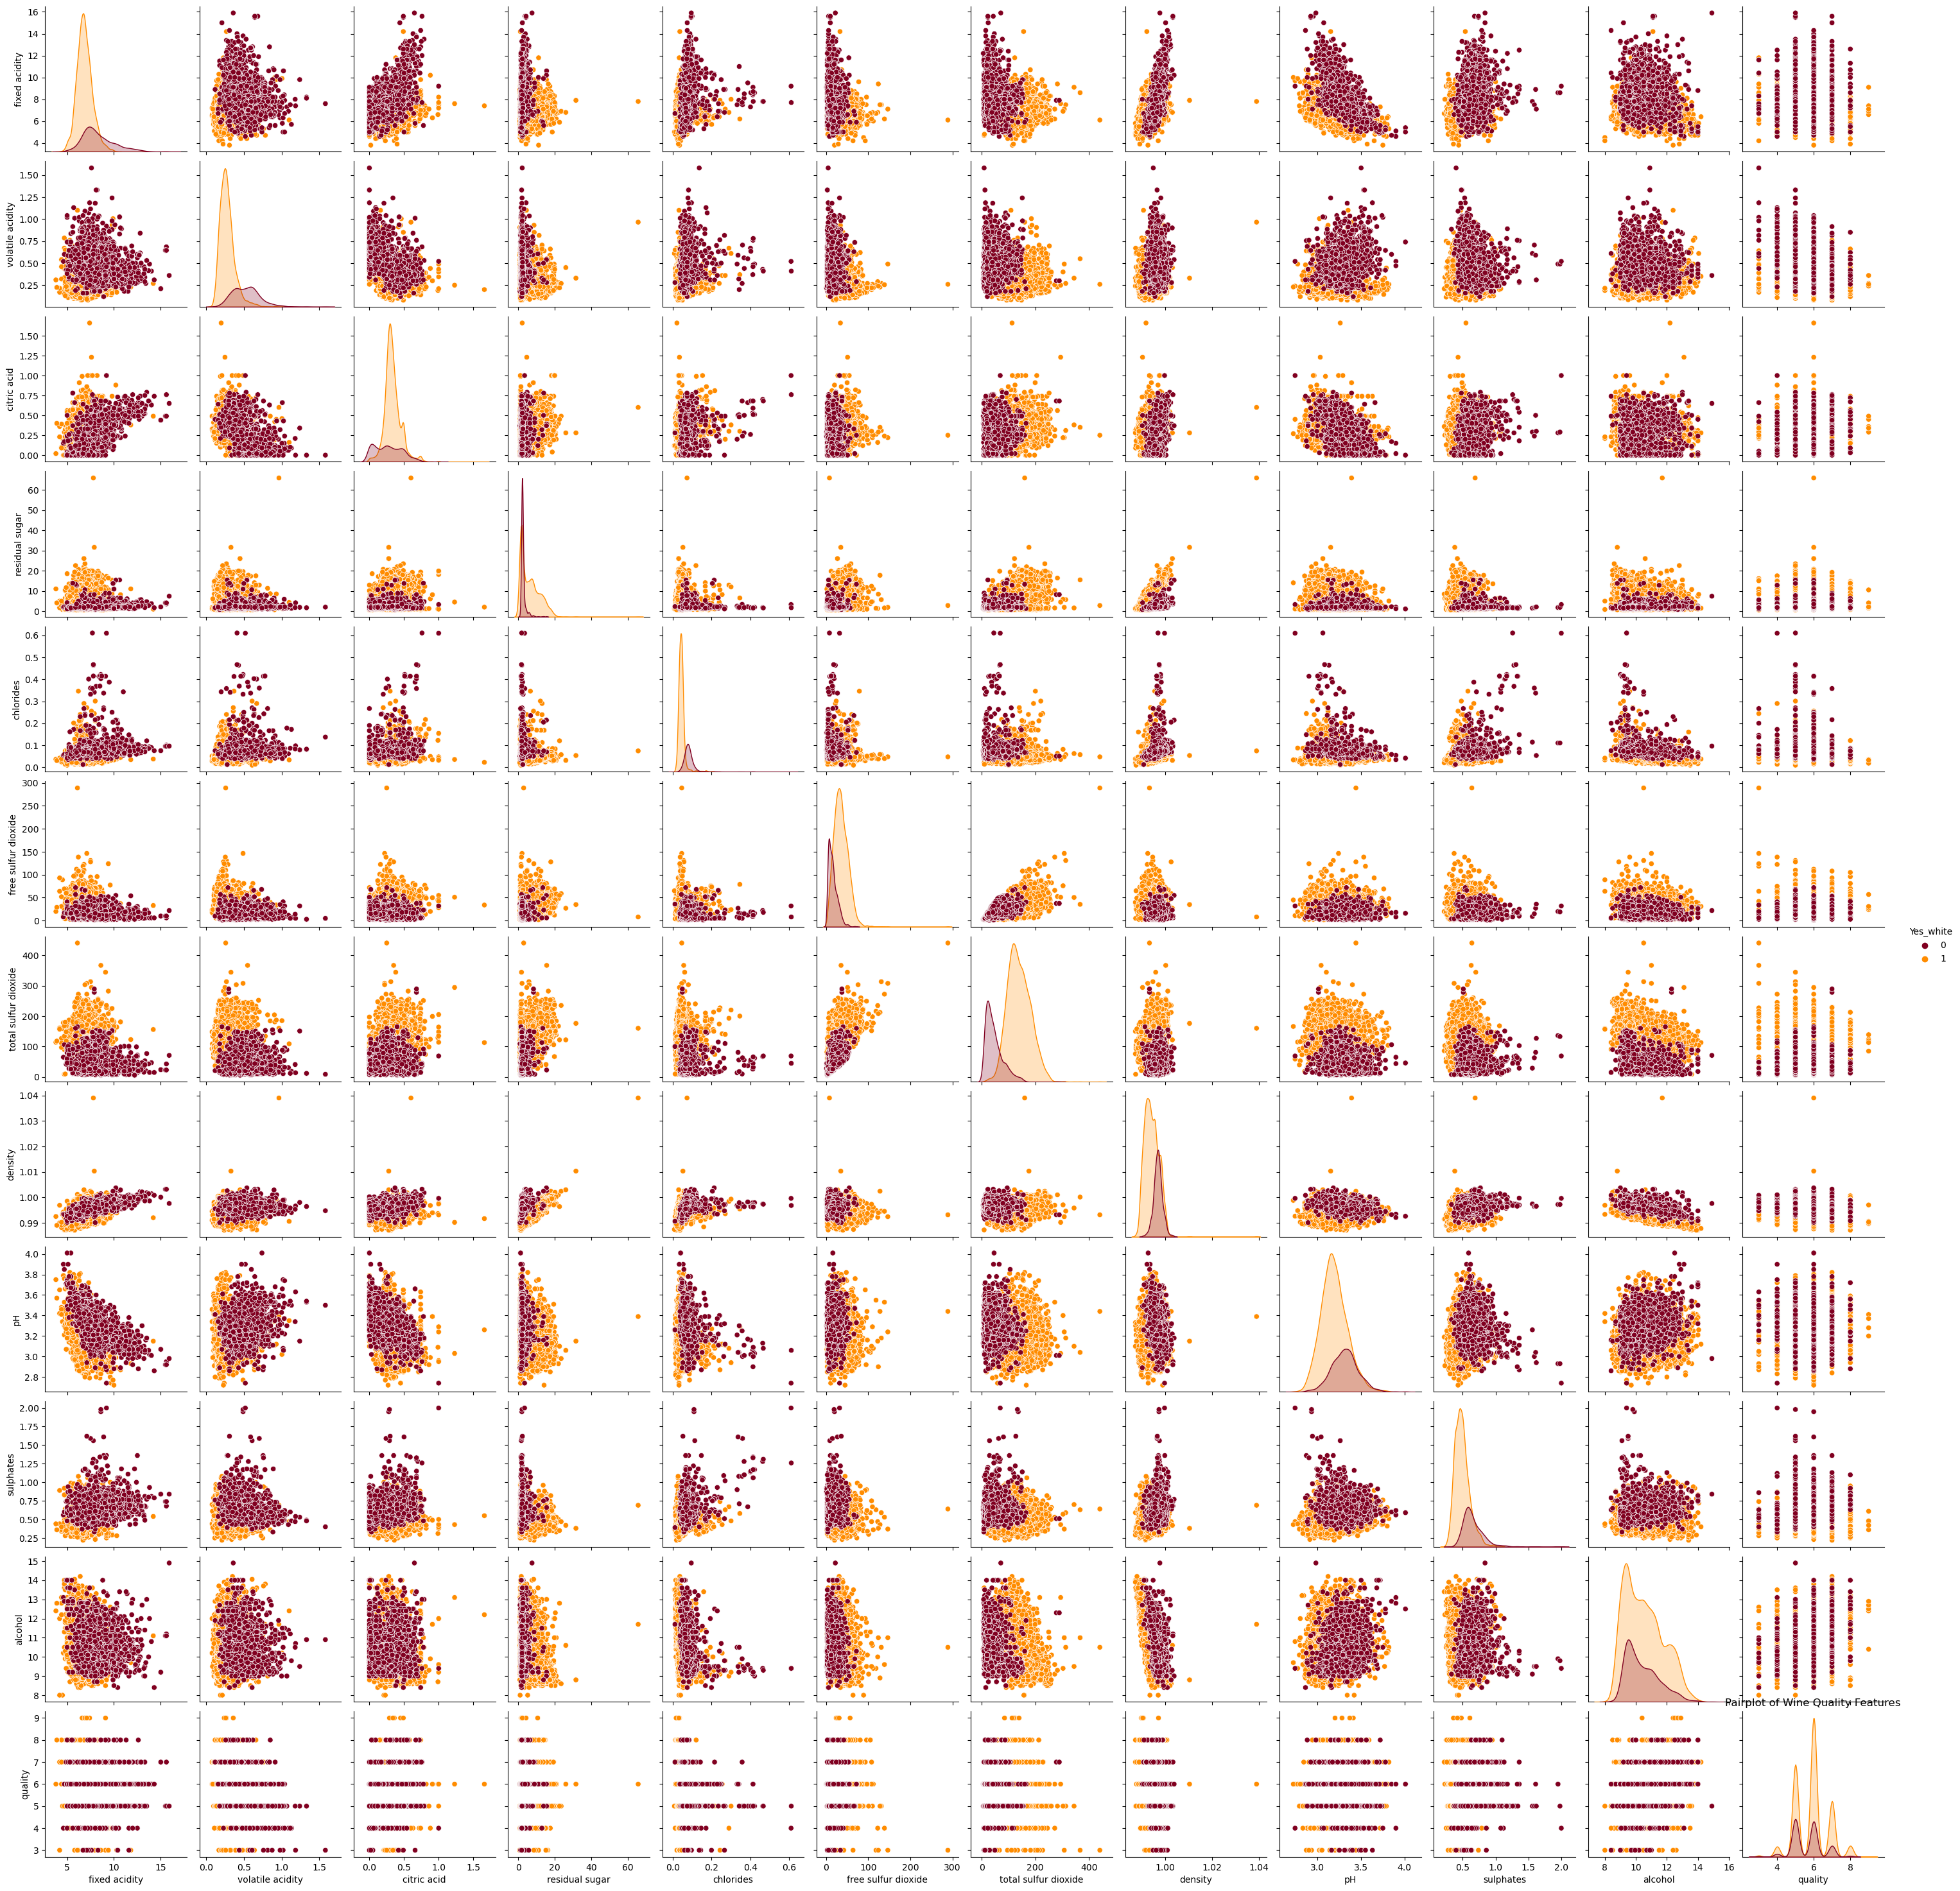

In [98]:
# Pairplot of features to determine which ones will best represent the data and questions asked?
custom_palette = ['#800020', '#FF8C00']
plt.figure(figsize=(24, 24))
sns.pairplot(wine_df, hue = "Yes_white")
plt.title("Pairplot of Wine Quality Features")
plt.show

In [28]:
#Exploring Yes_white 
wine_df.Yes_white.value_counts()

1    4898
0    1599
Name: Yes_white, dtype: int64

In [29]:
wine_df.pH.value_counts()

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
2.72      1
3.85      1
3.82      1
3.81      1
3.79      1
Name: pH, Length: 108, dtype: int64

In [30]:
wine_df.quality.value_counts()


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [31]:
wine_df.density.value_counts().unique()

array([69, 64, 63, 61, 59, 55, 54, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 30, 29, 28, 27, 26, 25, 24,
       22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1])

In [32]:
wine_df['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [33]:
wine_df.alcohol.value_counts().unique()


array([367, 332, 271, 229, 227, 217, 215, 214, 194, 193, 187, 177, 176,
       167, 161, 159, 158, 153, 148, 142, 137, 133, 123, 118, 110, 109,
       104,  98,  95,  89,  81,  80,  74,  73,  71,  69,  65,  64,  61,
        48,  42,  23,  20,  15,  13,  12,  10,   7,   5,   4,   3,   2,
         1])

In [34]:
wine_df['alcohol'].describe()


count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [35]:
wine_df.chlorides.value_counts().unique()

array([206, 200, 187, 185, 182, 175, 174, 169, 161, 160, 151, 142, 141,
       135, 130, 119, 116, 114, 112, 109, 108, 107,  97,  85,  81,  78,
        70,  69,  67,  63,  62,  60,  58,  54,  53,  52,  50,  49,  48,
        47,  45,  42,  41,  40,  39,  37,  35,  34,  31,  30,  28,  26,
        25,  24,  23,  20,  19,  17,  16,  15,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1])

In [36]:
wine_df['chlorides'].describe()


count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [37]:
wine_df.sulphates.value_counts().unique()

array([276, 243, 235, 232, 214, 208, 203, 197, 191, 190, 186, 172, 169,
       168, 167, 166, 157, 152, 148, 139, 138, 131, 129, 120, 113,  96,
        90,  85,  84,  79,  78,  71,  69,  61,  60,  54,  53,  45,  44,
        42,  38,  35,  34,  31,  24,  20,  17,  16,  15,  14,  13,  10,
         8,   7,   6,   5,   4,   3,   2,   1])

In [38]:
wine_df['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

## <Span style= 'color: #800020'>Initial questions 
1. Does alcohol have a relationship with wine quality?
2. Does density have a relationship with wine quality? 
3. Does chlorides have a relationship with wine quality?
4. Does category of wine "red or white" have a relationship to wine quality?

In [39]:
def split_wine(df):
    df= wine_df
    train, wine_test = train_test_split(wine_df, test_size=0.2, random_state=210)
    wine_train, wine_validate = train_test_split(train, test_size=0.25, random_state=210)   
    return wine_train, wine_validate, wine_test

In [40]:
wine_train, wine_validate, wine_test = split_wine(wine_df)
print(f'Training set shape: {wine_train.shape}')
print(f'Validation set shape: {wine_validate.shape}')
print(f'Test set shape: {wine_test.shape}')

Training set shape: (3897, 13)
Validation set shape: (1300, 13)
Test set shape: (1300, 13)


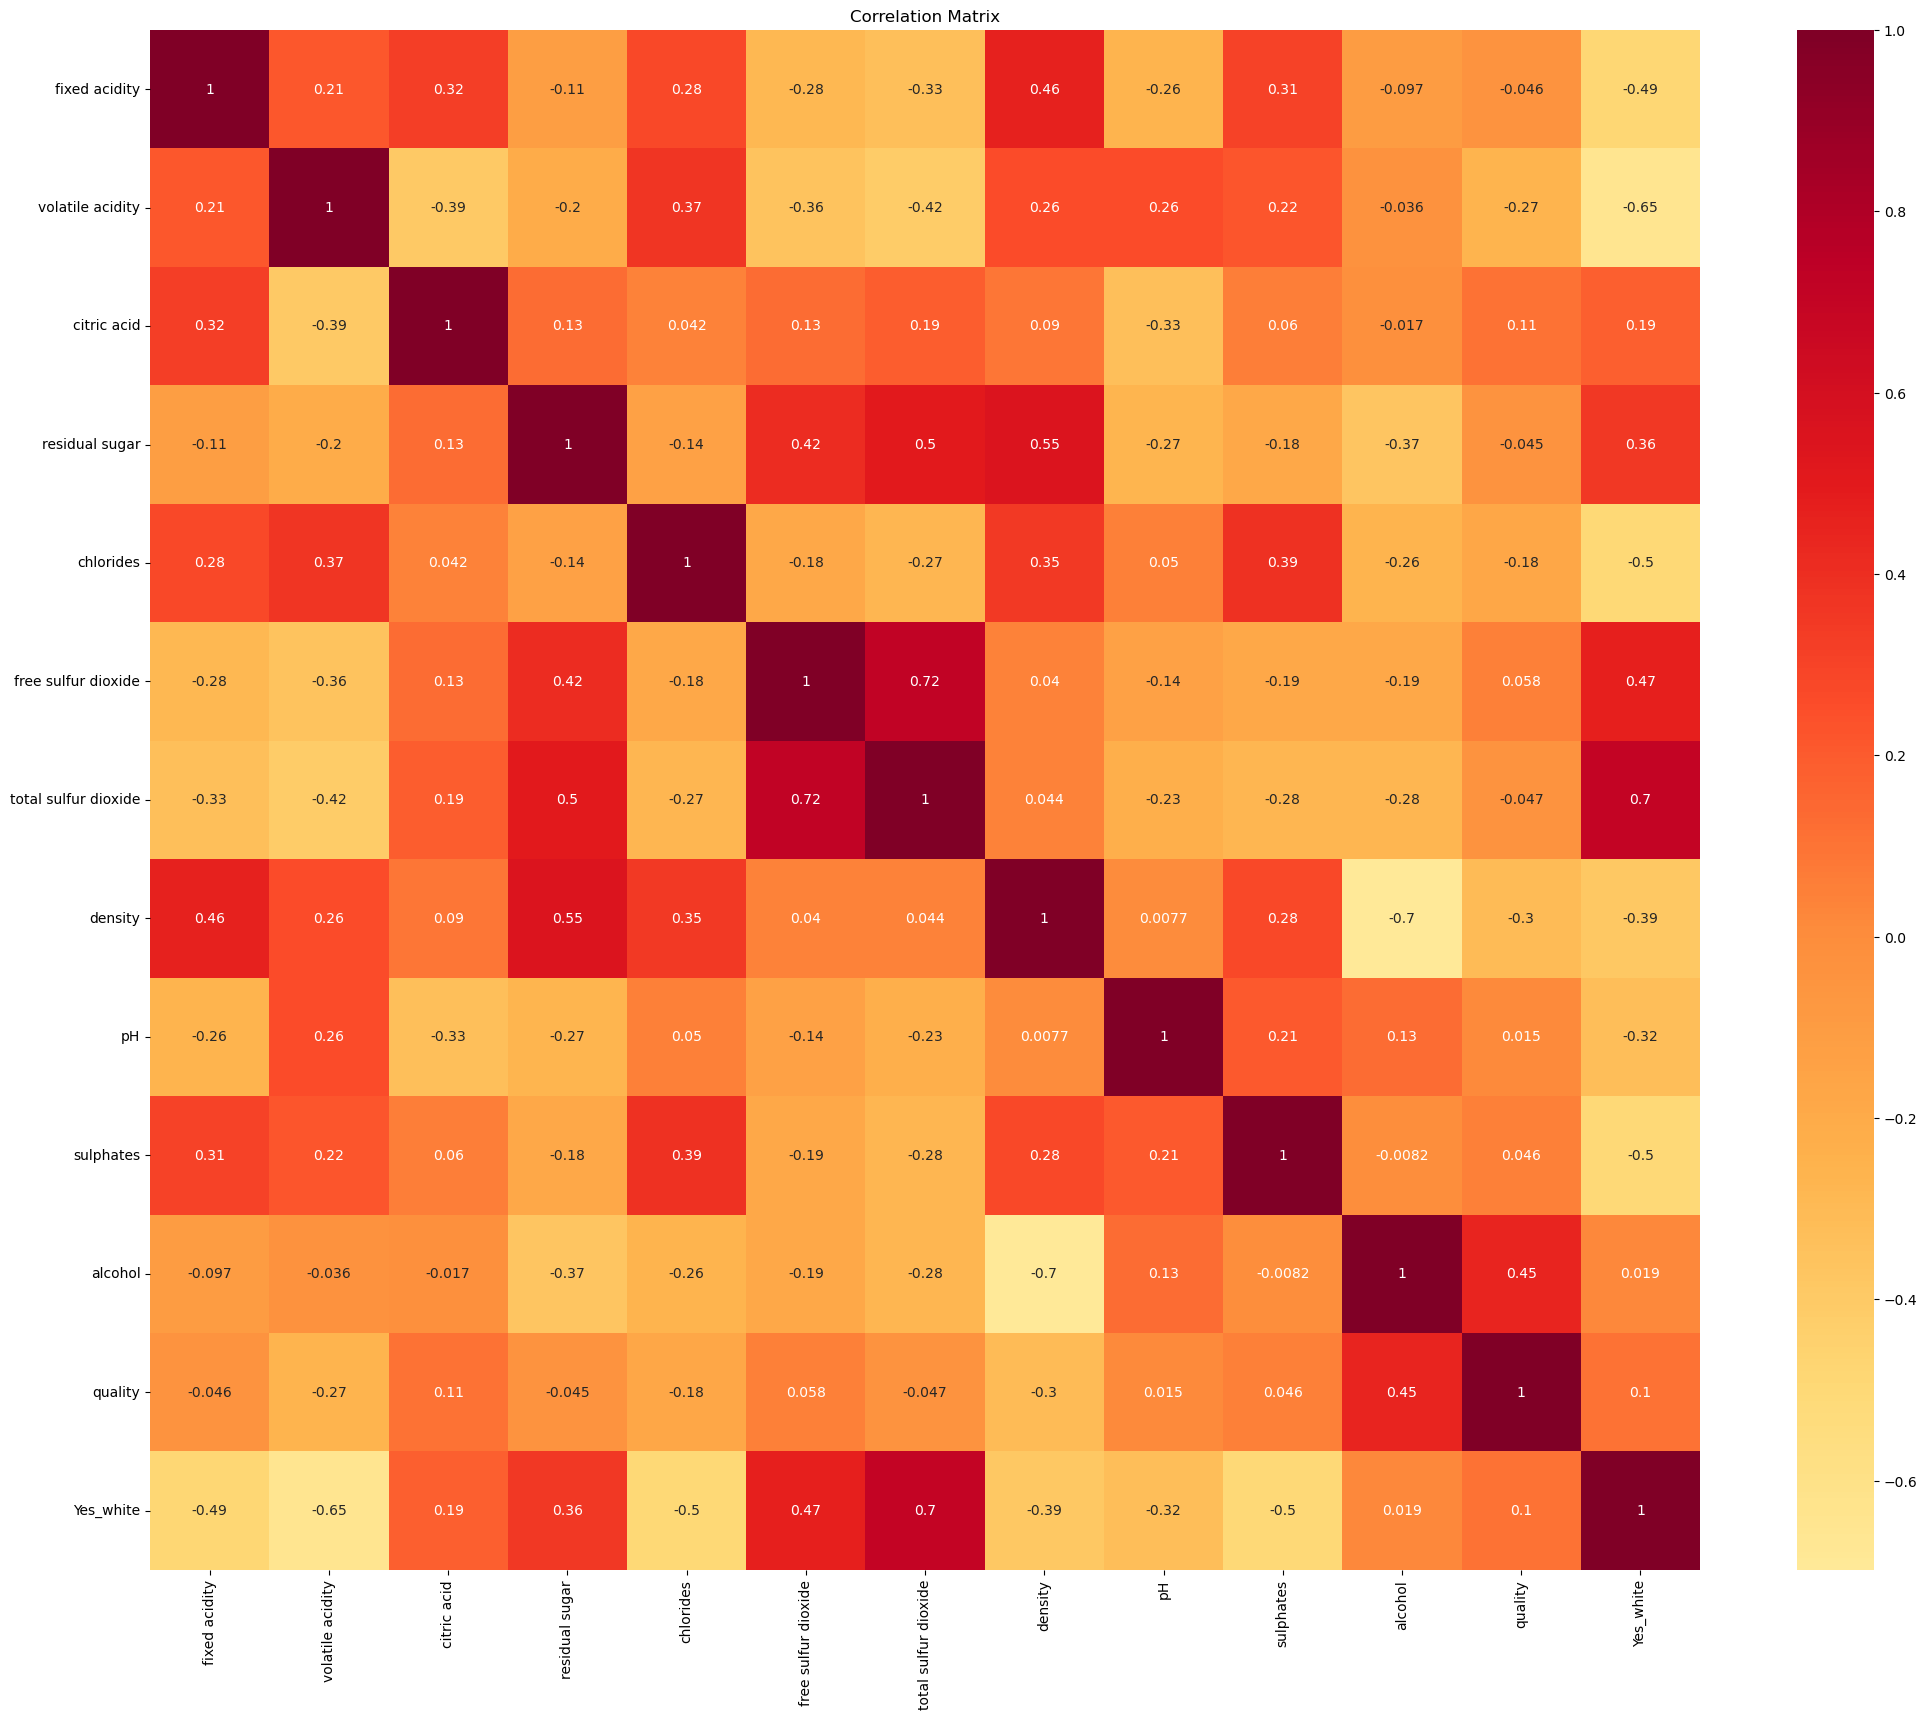

In [41]:
plt.figure(figsize=(25, 20))
sns.heatmap(wine_train.corr(), cmap='YlOrRd', center=0, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [42]:
#Explore correlation data by churn
train_correlation = wine_train.corr().style.format("{:1.0%}")
train_correlation

### <Span style= 'color: #800020'>SCALING PERFORMED

In [43]:
to_scale = ['alcohol', 'chlorides', 'density','Yes_white']

In [88]:
#CodeUp visualize scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

def visualize_scaler(scaler, df, features_to_scale, bins=50):
    #create subplot structure
    fig, axs = plt.subplots(len(features_to_scale), 2, figsize=(24, 24,))
    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), feature in zip(axs, features_to_scale):
        ax1.hist(df[feature], bins=bins, color='#E97451')
        ax1.set(title=f'{feature} before scaling', xlabel=feature, ylabel='count',)
    
        ax2.hist(df[feature], bins=bins, color='#E97451')
        ax2.set(title=f'{feature} after scaling with {scaler.__class__.__name__}', xlabel=feature, ylabel='count')
    plt.tight_layout()

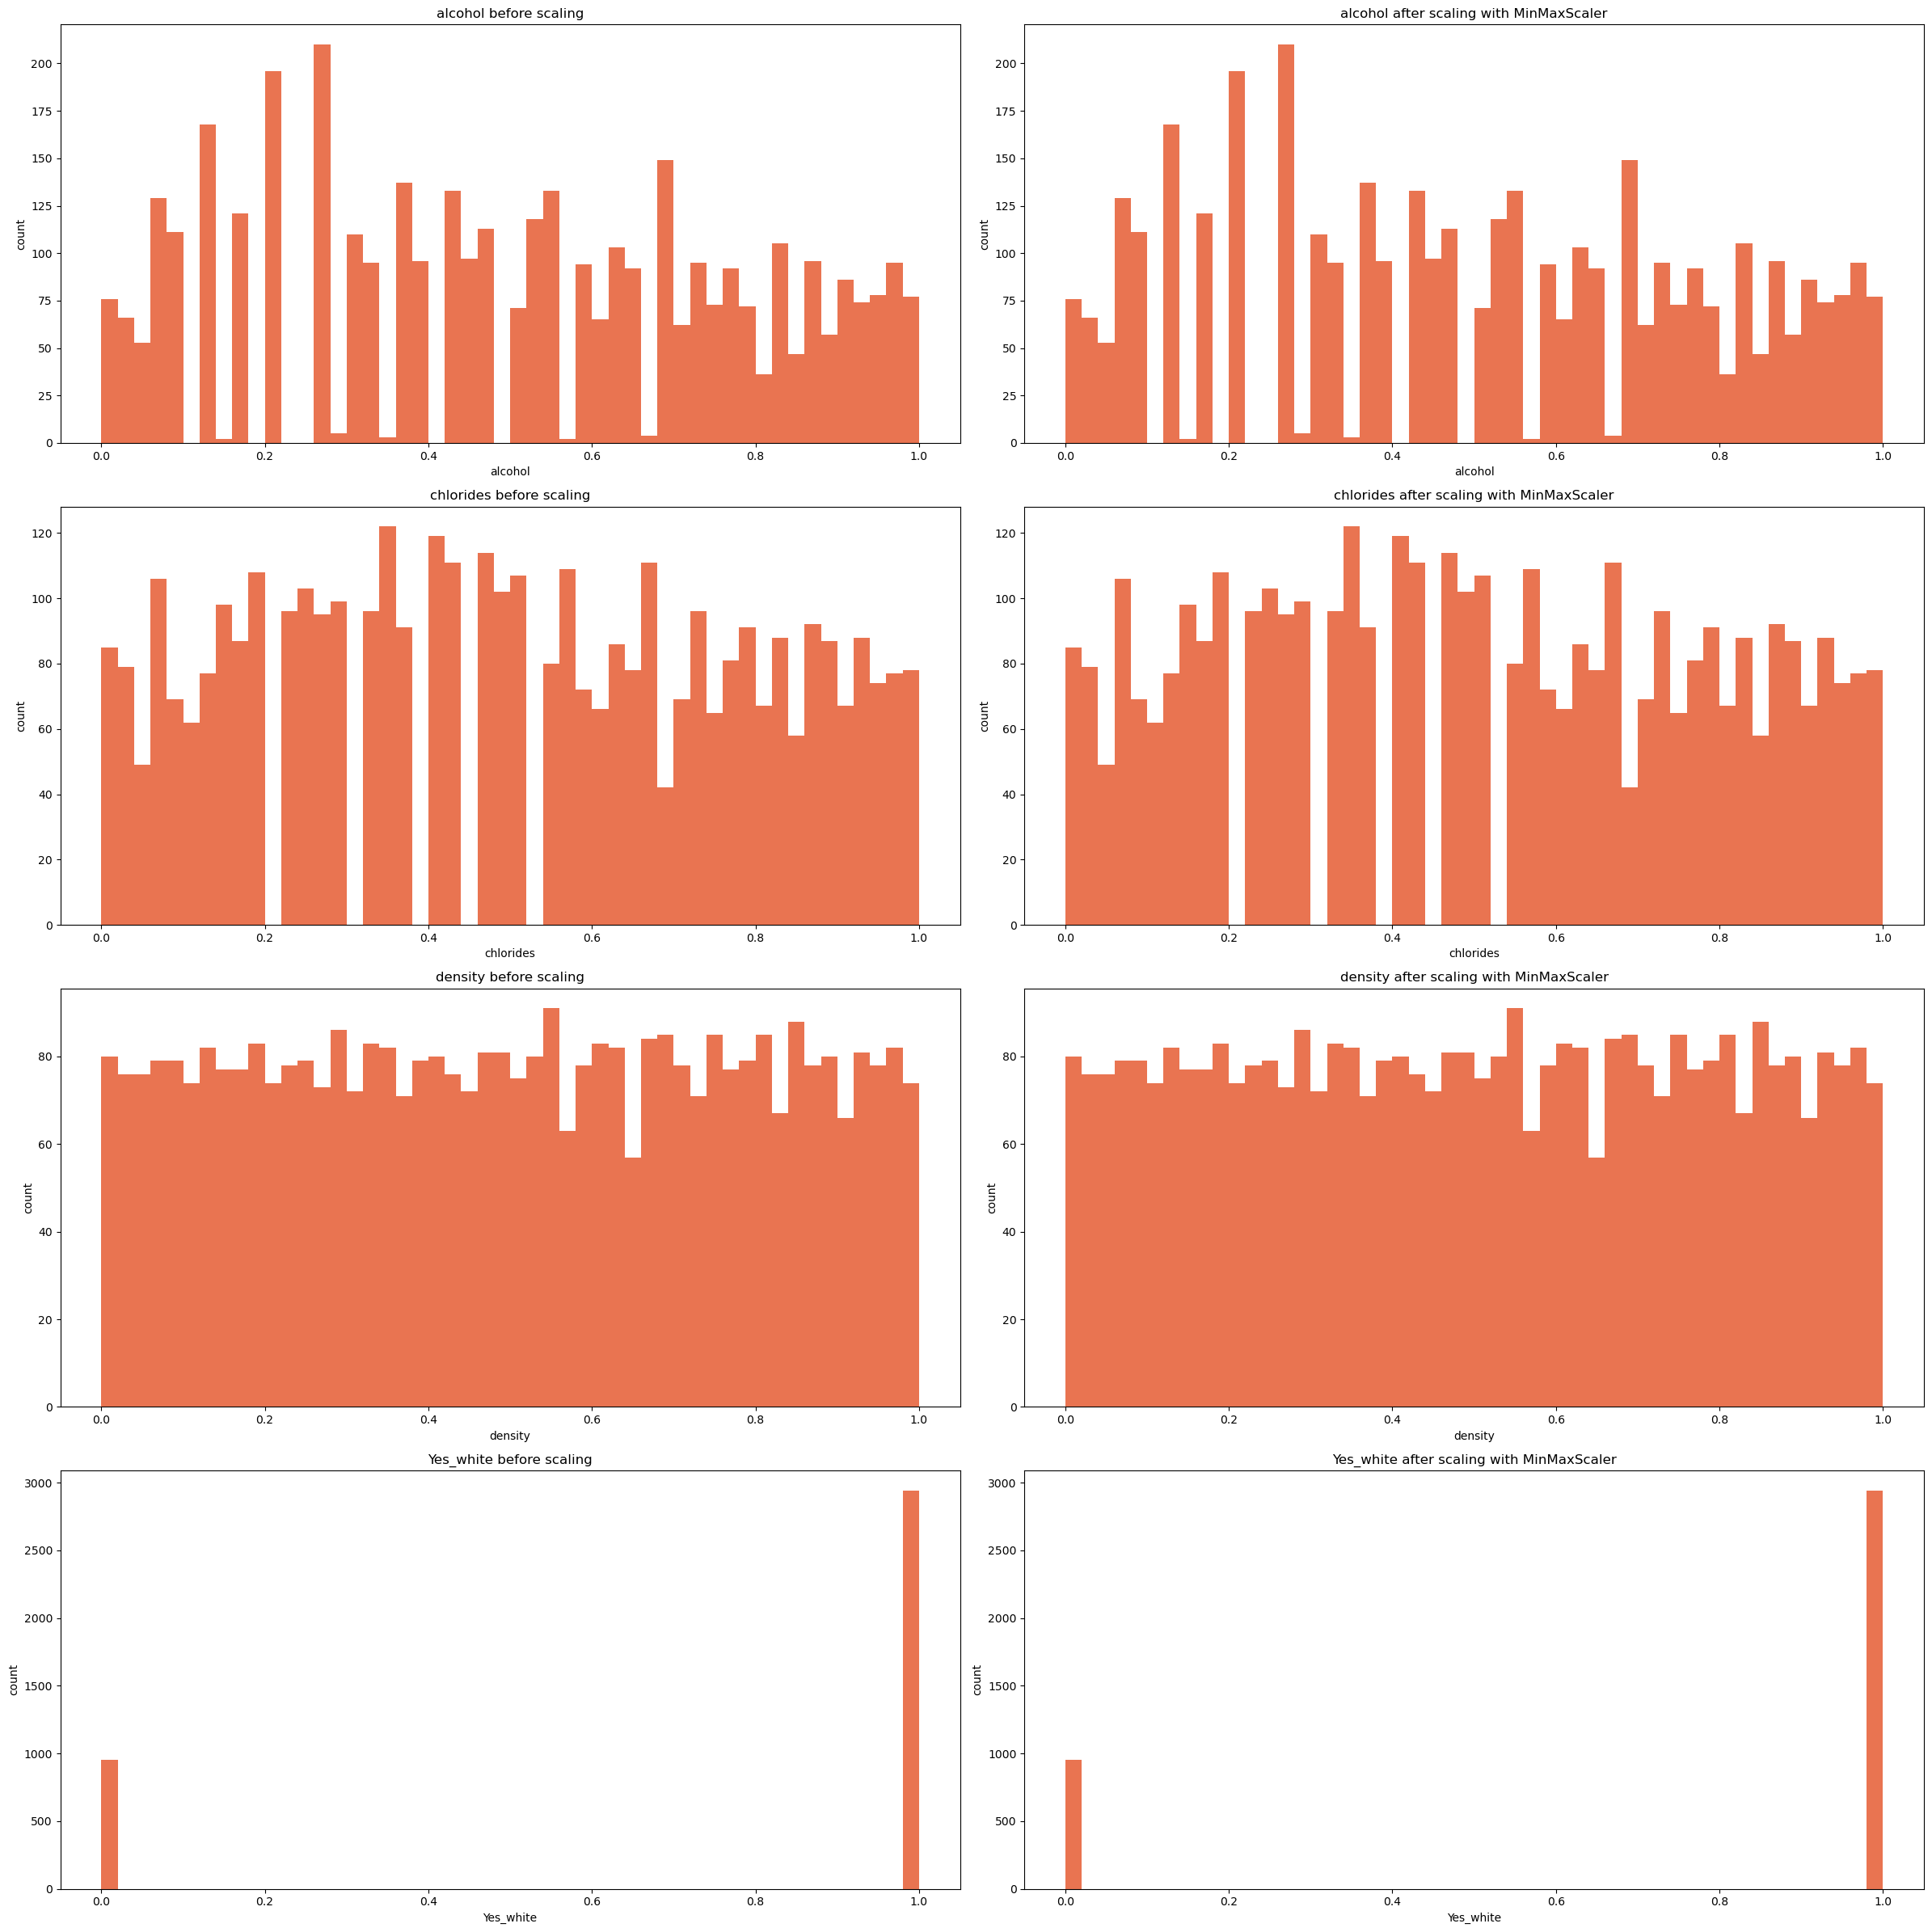

In [89]:
# call function with minmax
mm_scaler = MinMaxScaler()
visualize_scaler(scaler=mm_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

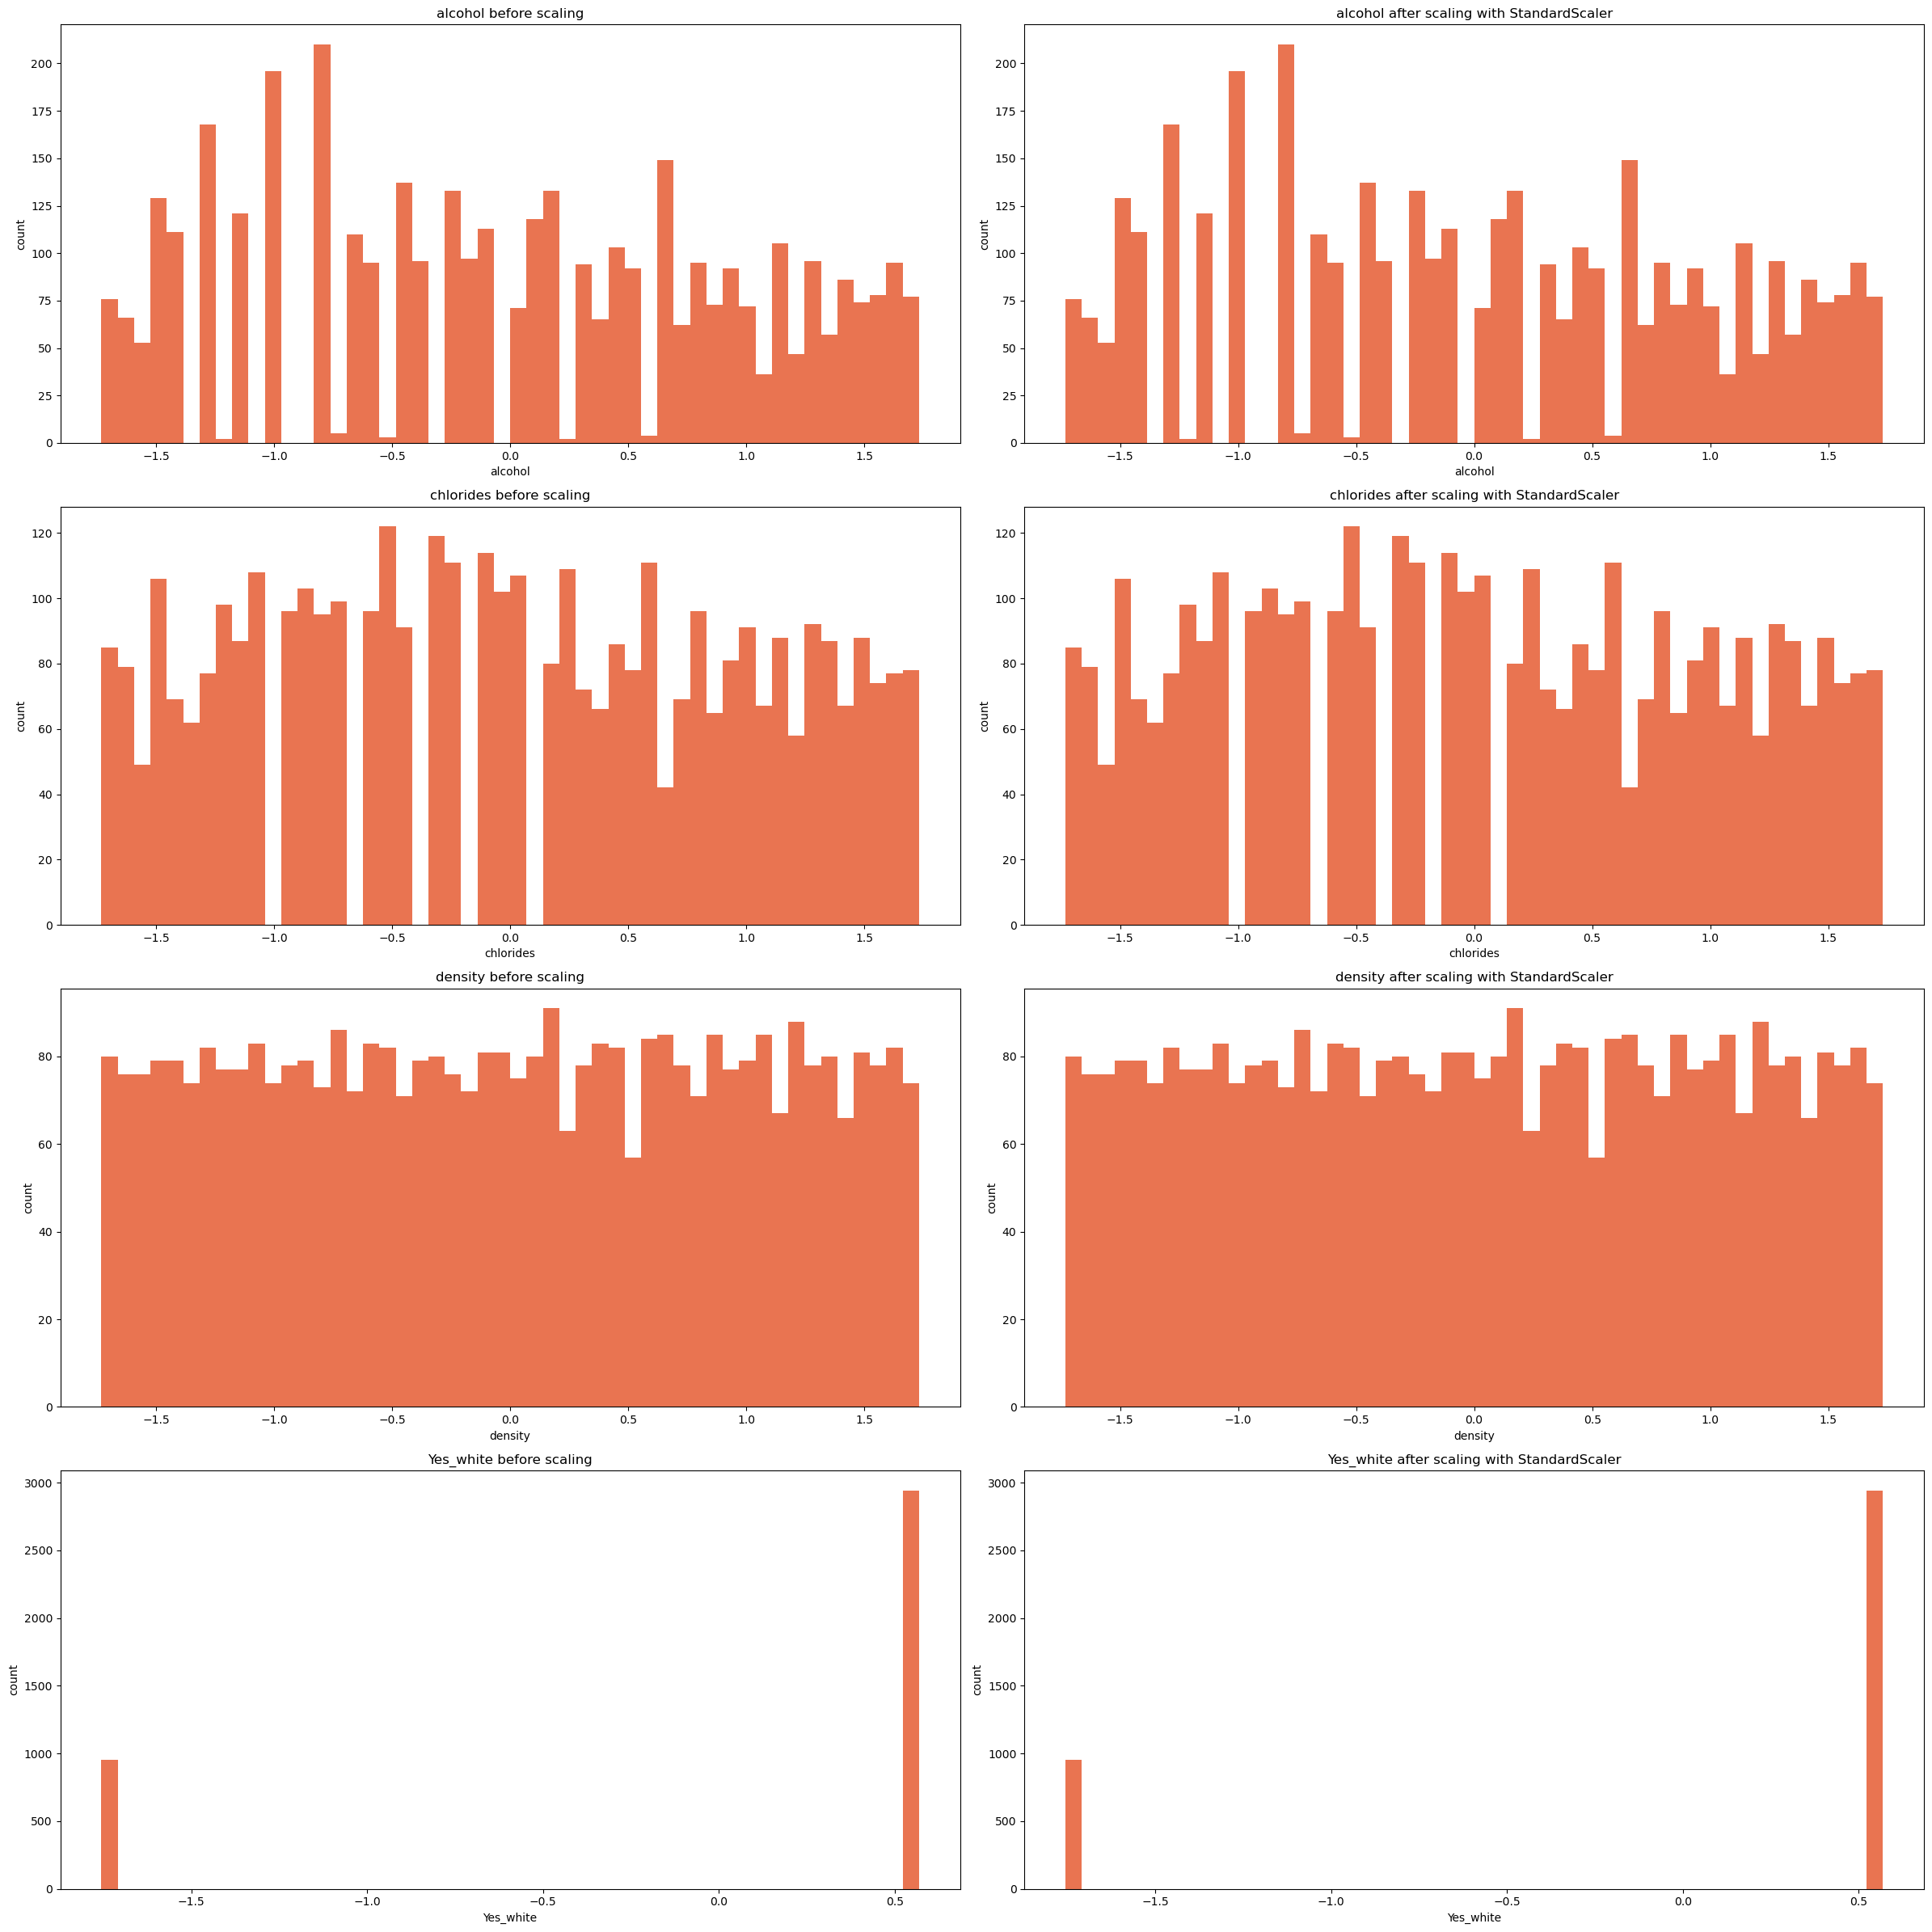

In [90]:
# call function with standardscaler
standard_scaler = StandardScaler()
visualize_scaler(scaler=standard_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

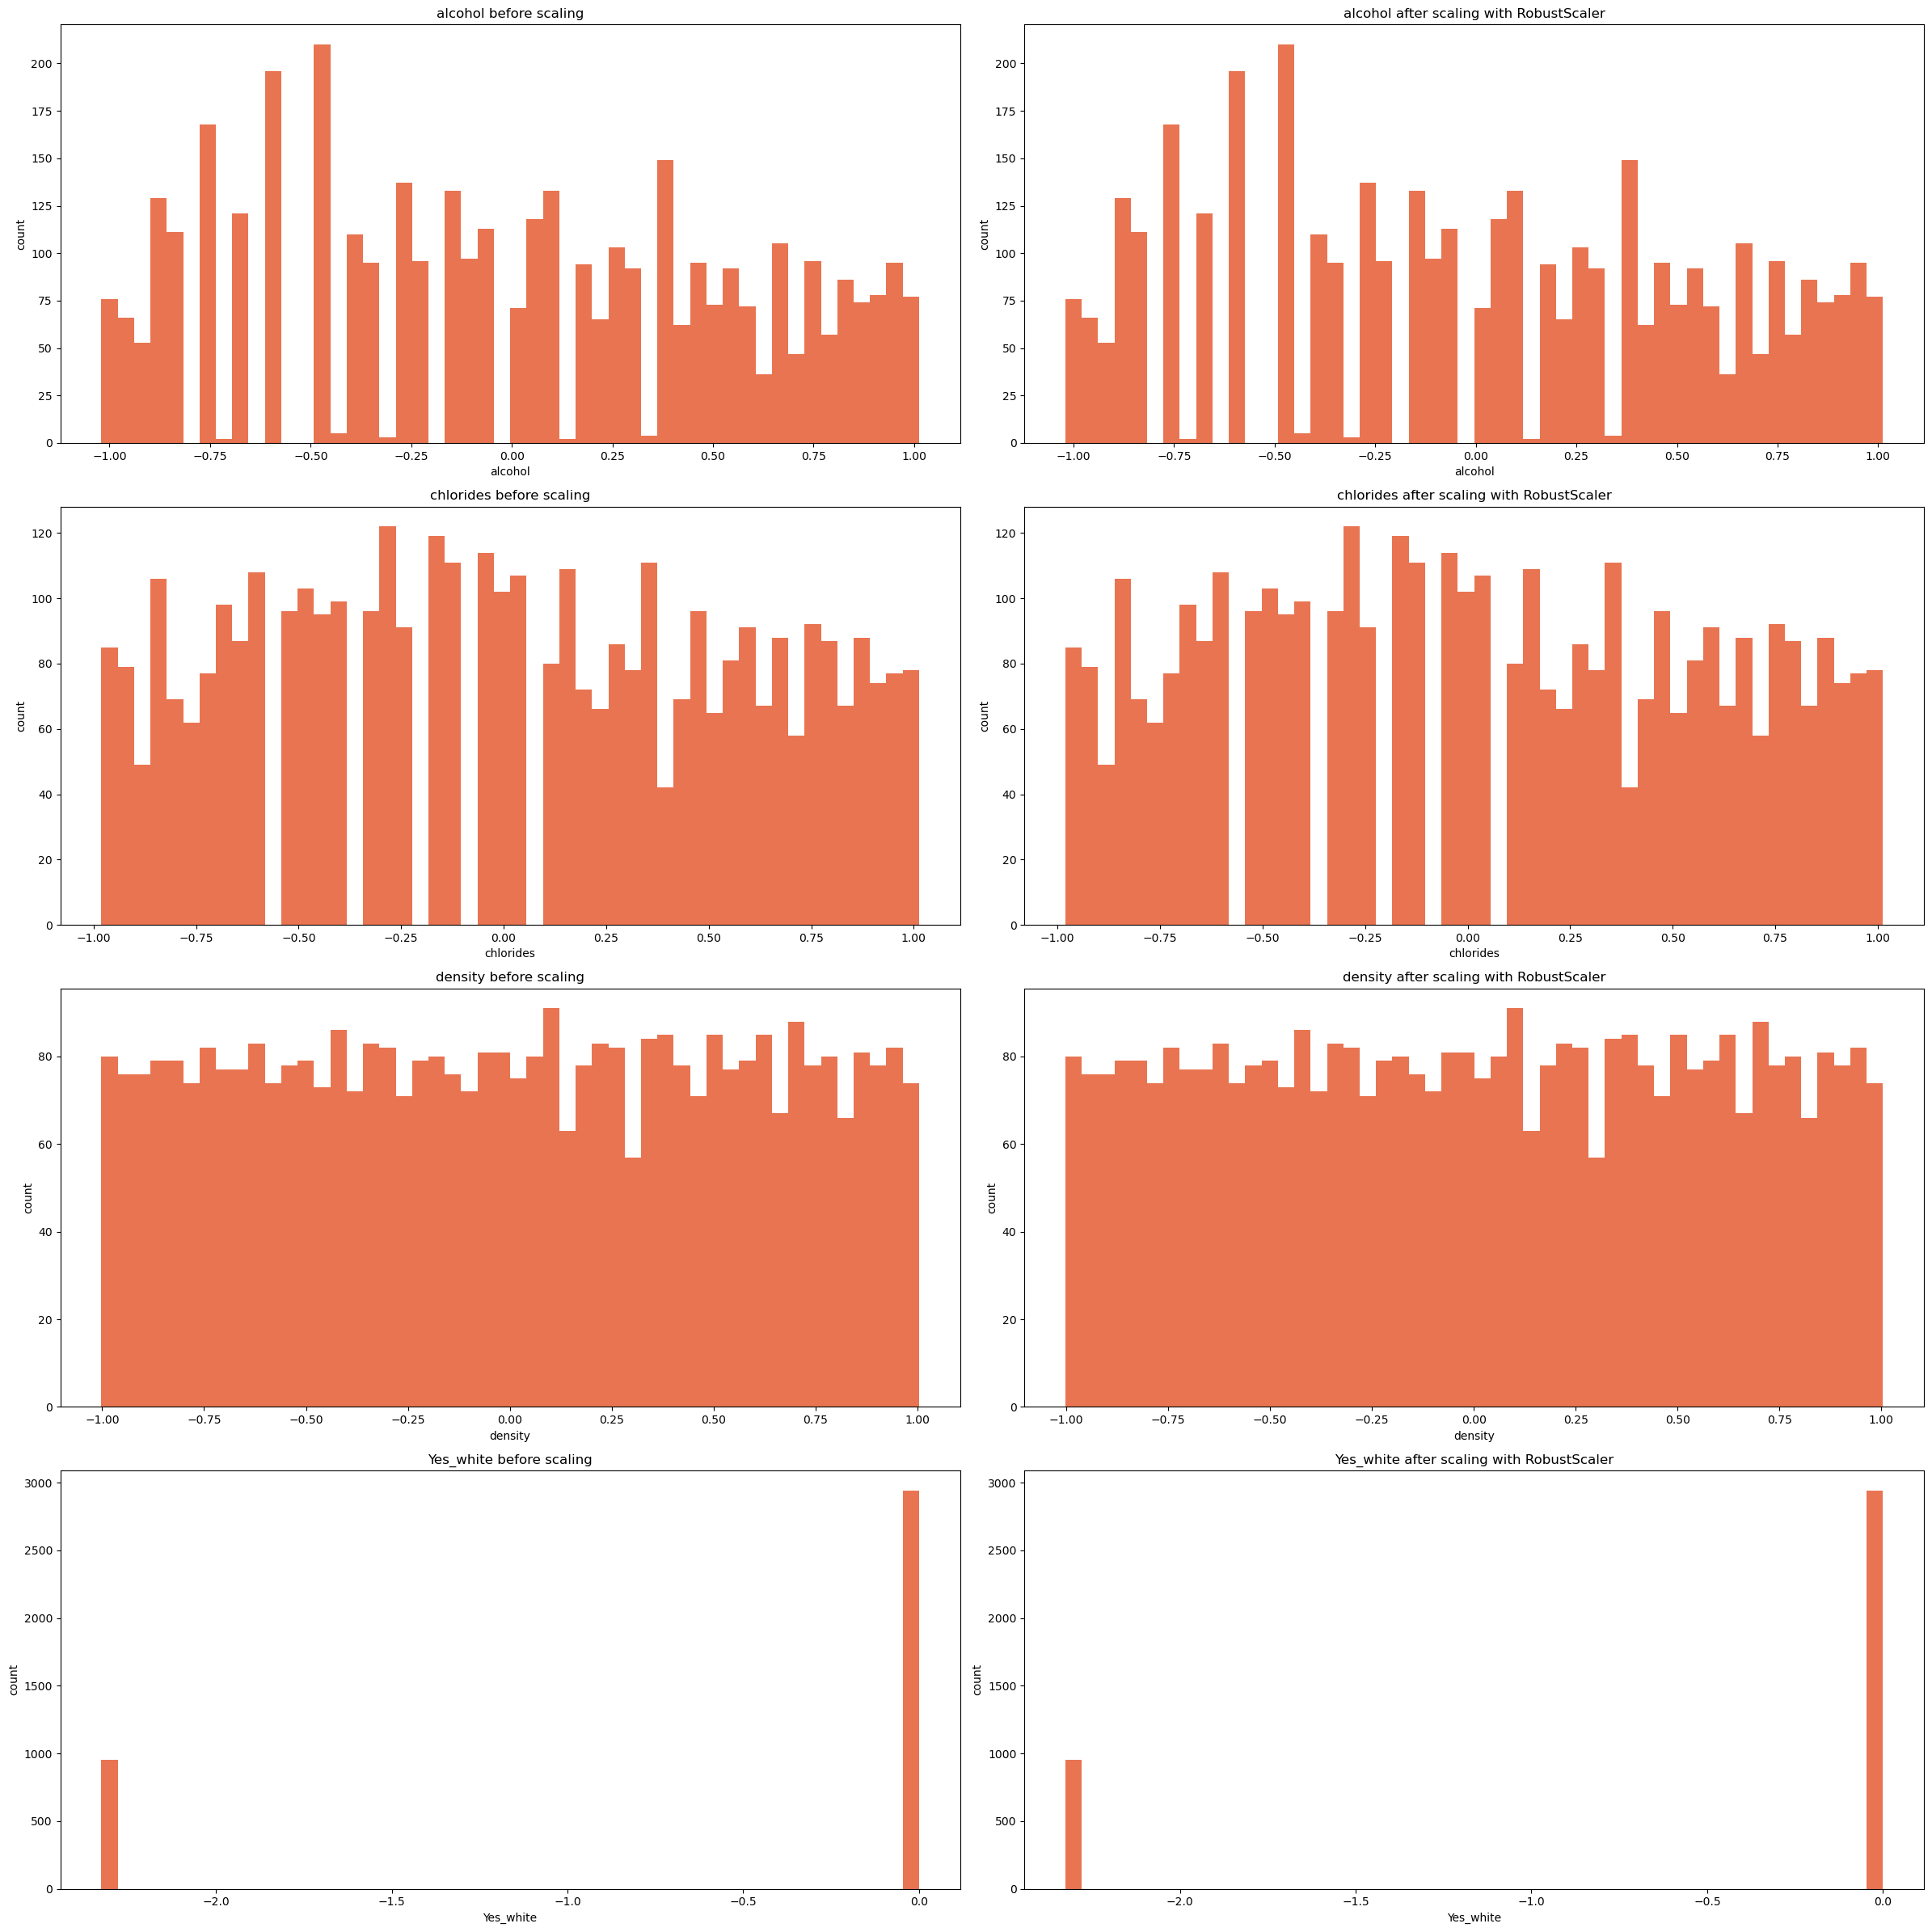

In [91]:
# call function with robustscaler
r_scaler = RobustScaler()
visualize_scaler(scaler=r_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

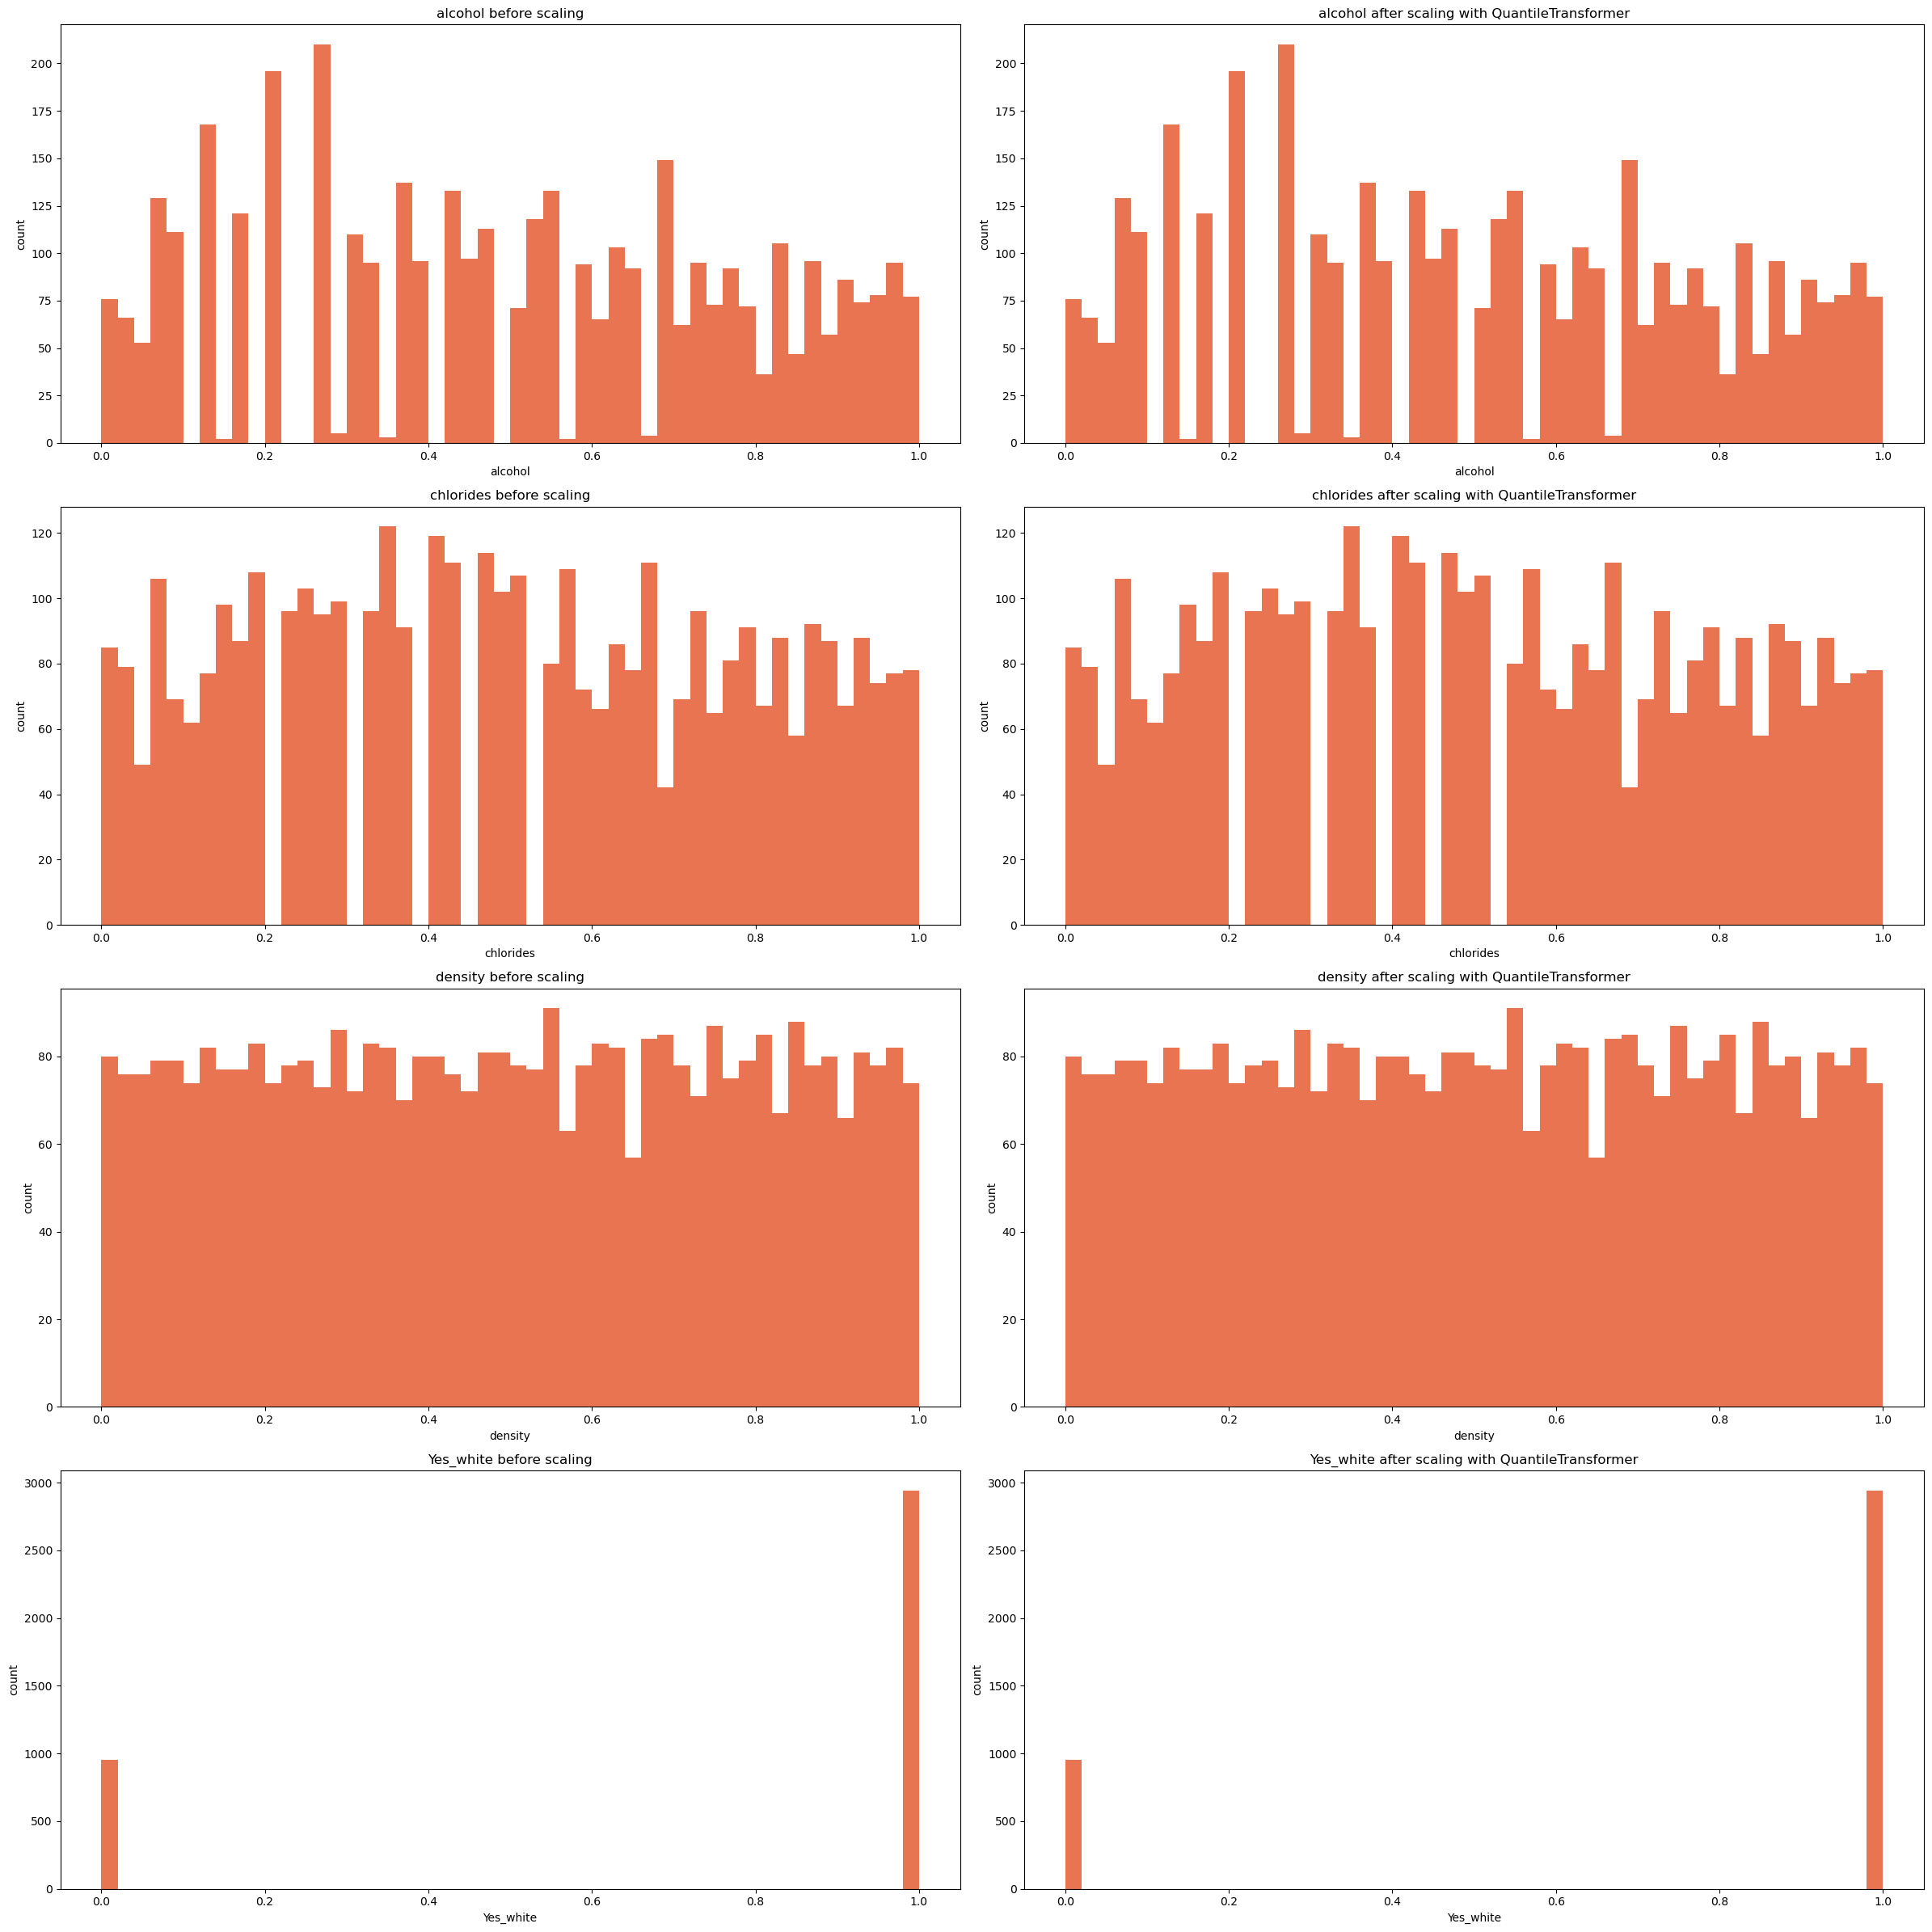

In [94]:
# call function using QuantileTransformer
qt_scaler = QuantileTransformer()
visualize_scaler(scaler=qt_scaler, df=wine_train, features_to_scale=to_scale, bins=50)

#### Takeaways - Scaling has a normal distribution Standard Scaler will be used for Clustering

## <Span style= 'color: #800020'>Final Questions 
1. <s>Does alcohol have a relationship with wine quality?</s> <span style='color:red'>removed question because feature redundant. Same as density 
1. Does density have a relationship with wine quality? 
3. Does chlorides have a relationship with wine quality?
3. Does volitale acidity have a relationship with wine quality?
4. Does category of wine "red or white" have a relationship to wine quality?

### <Span style= 'color: #800020'> FEATURE COMPARISON VISUALIZATIONS

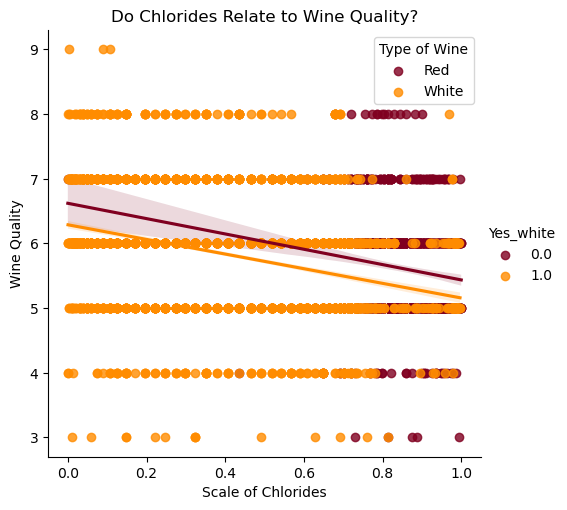

In [50]:
def chloride_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='chlorides', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Scale of Chlorides')
    plt.ylabel('Wine Quality')
    plt.title('Do Chlorides Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()

chloride_lmplot(wine_train)


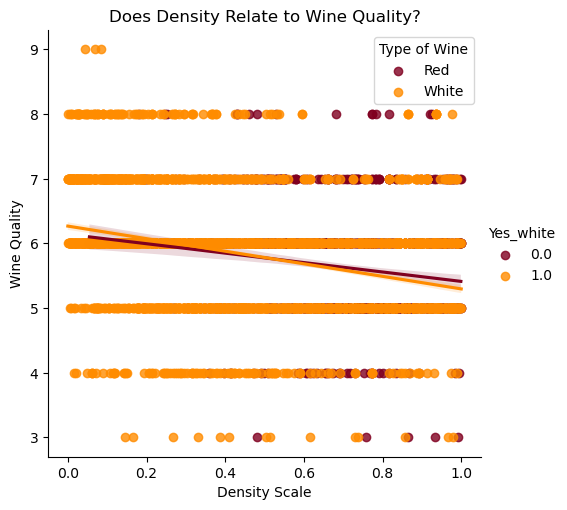

In [51]:
def density_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='density', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Density Scale')
    plt.ylabel('Wine Quality')
    plt.title('Does Density Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()

density_lmplot(wine_train)


Data visualization shows that the less Chlorides the better the wine quality 
The chloride content in wine is influenced by the terroir and grape variety. Quantification is essential as it significantly affects the wine's flavor, and high concentrations can lead to an undesirable salty taste and reduced market appeal. (Coli et al. 2015)

Coli, M. S., Rangel, A. G. P., Souza, E. S., Oliveira, M. F., & Chiaradia, A. C. N. (2015). Chloride concentration in red wines: influence of terroir and grape type. Food Science and Technology, 35, 95-99.

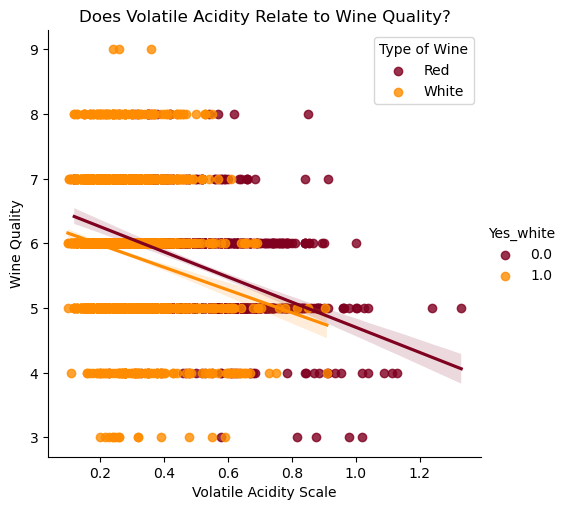

In [52]:
def acid_lmplot(df):
    custom_palette = ['#800020', '#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}

    cl = sns.lmplot(x='volatile acidity', y='quality', data=wine_train, hue='Yes_white', palette=custom_palette)
    plt.xlabel('Volatile Acidity Scale')
    plt.ylabel('Wine Quality')
    plt.title('Does Volatile Acidity Relate to Wine Quality?')


    # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
    for t, label in zip(leg.texts, new_labels.values()):
        t.set_text(label)
    plt.show()
acid_lmplot(wine_train)

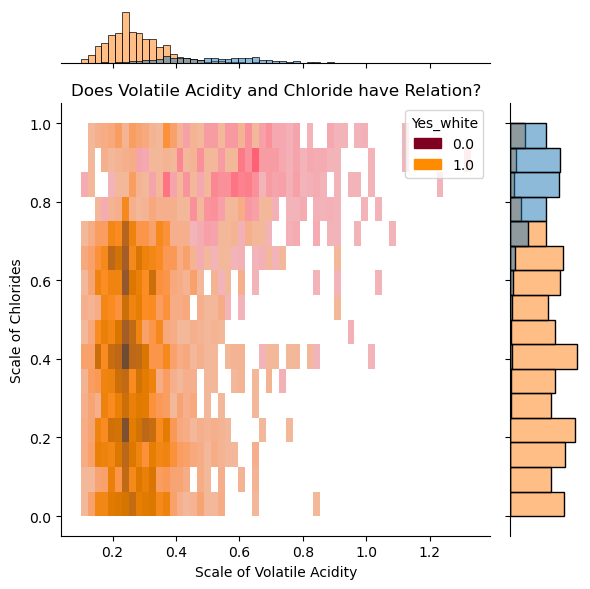

In [53]:
def vc_jplot():
    custom_palette = ['#800020','#FF8C00']
    vc = sns.jointplot(data=wine_train, x="volatile acidity", y="chlorides", hue="Yes_white", kind="hist", palette=custom_palette)
    plt.xlabel('Scale of Volatile Acidity')
    plt.ylabel('Scale of Chlorides')
    plt.title('Does Volatile Acidity and Chloride have Relation?')
    plt.tight_layout()
    plt.show()

vc_jplot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


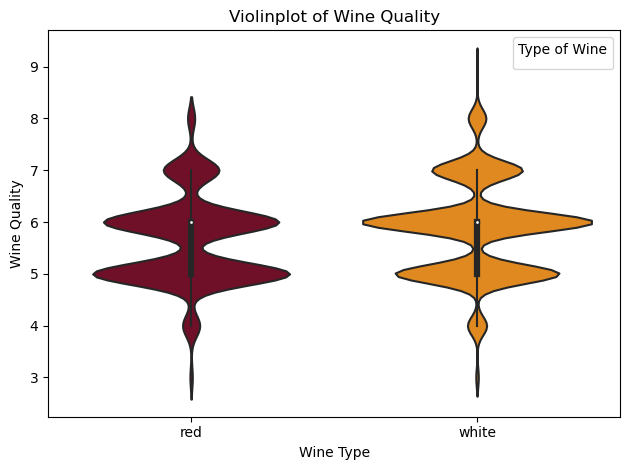

In [54]:
#violin plot of wine type vs quality

def plot_violinplot(df):
    custom_palette = ['#800020','#FF8C00']
    new_labels = {'0': 'Red', '1': 'White'}
    x = ['red', 'white']
    vp = sns.violinplot(x='Yes_white', y="quality", data=wine_train, palette=custom_palette)

# Relabel the x-axis ticks
    plt.xticks(range(len(x)), x)
    # Modify the legend labels
        # Rename the hue legend
    leg = plt.legend(title='Type of Wine')
#     for t, label in zip(leg.texts, new_labels.values()):
#         t.set_text(label)
   
    vp.set_xlabel('Wine Type')
    vp.set_ylabel('Wine Quality')
    plt.title('Violinplot of Wine Quality')
    plt.tight_layout()
    plt.show()
plot_violinplot(wine_train)


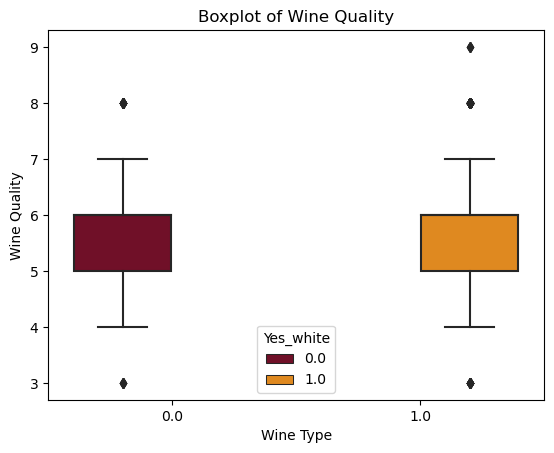

In [55]:
custom_palette = ['#800020','#FF8C00']
sns.boxplot(x='Yes_white', y="quality", data=wine_train, hue='Yes_white', palette=custom_palette)
plt.title('Boxplot of Wine Quality')
plt.xlabel('Wine Type')
plt.ylabel('Wine Quality')
plt.show()


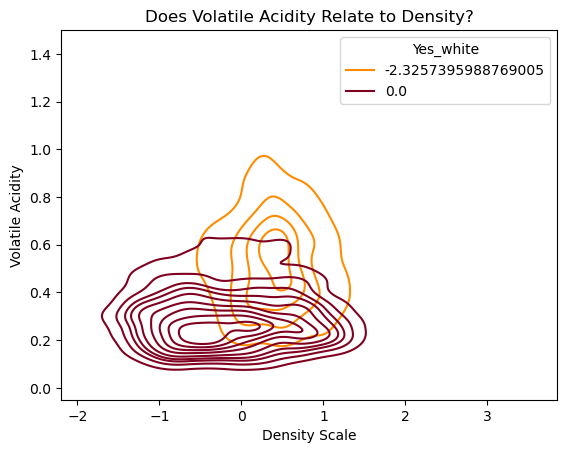

In [48]:
def wine_KDE():
    custom_palette = ['#FF8C00', '#800020']
    sns.kdeplot(data=wine_train, x='density', y='volatile acidity', hue='Yes_white',palette=custom_palette)
    plt.xlabel('Density Scale')
    plt.ylabel('Volatile Acidity')
    plt.title('Does Volatile Acidity Relate to Density?')
    plt.show()
wine_KDE()

## <Span style= 'color: #800020'>Questions using statistical testing 

In [56]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8              0.70         0.00             1.7   0.780280   
2844            8.0              0.22         0.31             5.6   0.543043   
3899            6.0              0.21         0.30             8.7   0.196697   
1019            7.0              0.50         0.14             1.8   0.844845   
3951            6.3              0.33         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

       alcohol  quality  Yes_white  
762   0.421421        6        0.0  
2844  0.655155        5        1.0  
3899  0.588088        5        1.0  
1019  0.526026        5        0.0  
3951  0.028028        5        1.0

In [57]:
to_scale = ['alcohol', 'chlorides', 'density','Yes_white']

In [58]:
alpha = .05

<Span style= 'color: #800020'>Hypothesis 1 - Pearson R

- alpha = .05
- H0 = Chlorides has no correlation with wine quality
- Ha = Chlorides is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [59]:
#chlorides stat
def chlorides_stat(wine_train, wine_validate, wine_test):
    alpha = 0.05
    train_r, train_p = pearsonr(wine_train.chlorides, wine_train.quality)
    validate_r, validate_p = pearsonr(wine_validate.chlorides, wine_validate.quality)
#     test_r, test_p = pearsonr(test.chlorides, test.quality)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
chlorides_stat(wine_train, wine_validate, wine_test)

train_r: -0.2794087305902656
train_p: 8.110788659141262e-71
validate_r: -0.23791639674779913
validate_p: 3.465430434167978e-18
The p-value is less than the alpha: True
Outcome: We reject the null


<Span style= 'color: #800020'>Hypothesis 2 - Pearson R

- alpha = .05
- H0 = Density has no correlation with wine quality
- Ha = Density is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [60]:
#density stat
from scipy.stats import pearsonr, spearmanr
def density_stat(wine_train, wine_validate, wine_test):
    alpha = 0.05
    train_r, train_p = pearsonr(wine_train.density, wine_train.quality)
    validate_r, validate_p = pearsonr(wine_validate.density, wine_validate.quality)
#     test_r, test_p = pearsonr(test.alcohol, test.quality)
    print('train_r:', train_r)
    print('train_p:',train_p)
    print('validate_r:', validate_r)
    print('validate_p:', validate_p)
    print(f'The p-value is less than the alpha: {validate_p < alpha}')
    if validate_p < alpha:
        print('Outcome: We reject the null')
    else:
        print("Outcome: We fail to reject the null")
        
density_stat(wine_train, wine_validate, wine_test)

train_r: -0.30277255174618994
train_p: 2.0083280974295455e-83
validate_r: -0.2863945568864837
validate_p: 5.791435791024616e-26
The p-value is less than the alpha: True
Outcome: We reject the null


## <Span style= 'color: #800020'> Clustering using KMeans and Standard Scaler

In [61]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Create X using volatiel_acid and density
X = wine_train[['volatile acidity', 'density','chlorides']]
X.head()


volatile acidity   density  chlorides
762               0.70  0.755077   0.780280
2844              0.22  0.315315   0.543043
3899              0.21  0.383528   0.196697
1019              0.50  0.676176   0.844845
3951              0.33  0.941441   0.761261

In [62]:
# Scarler using X.columns
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

volatile acidity   density  chlorides
762           2.229825  0.883356   0.970976
2844         -0.734706 -0.639621   0.149079
3899         -0.796467 -0.403387  -1.050821
1019          0.994604  0.610107   1.194656
3951         -0.055335  1.528769   0.905085

#### <Span style= 'color: #800020'> Determine k

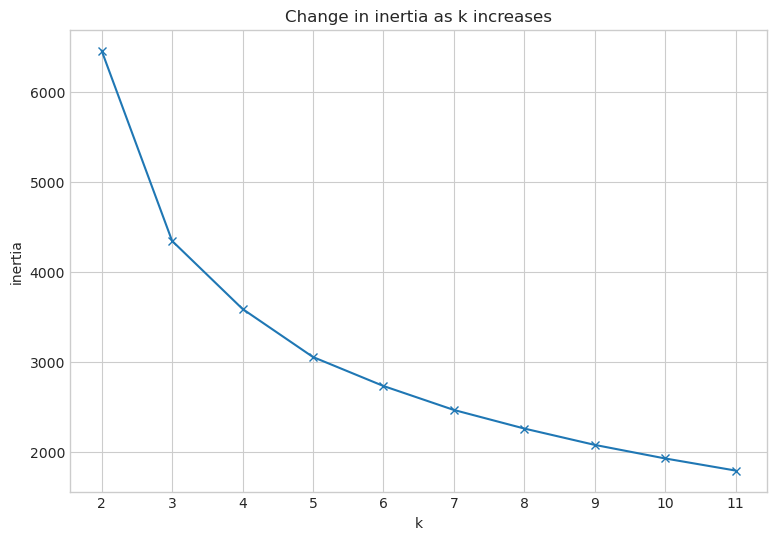

In [63]:
# Elbow approach for to determine K "Codeup instructor "
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


#### <Span style= 'color: #800020'>We are going to go with "3" for k
### <Span style= 'color: #800020'>Create 3 cluster  models and visualize them 

In [64]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def create_cluster_models(wine_train, X, k):
    """Takes in df, X (dataframe with variables you want to cluster on), and k
    It scales the X, calculates the clusters, and returns the DataFrame (with clusters), 
    the scaled DataFrame, the scaler, kmeans object, and unscaled centroids as a DataFrame"""

    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values)
    
    #Model 1
    kmeans = KMeans(n_clusters=k, random_state=210)
    kmeans.fit(X_scaled[['volatile acidity', 'density']])
    centroids1 = pd.DataFrame((kmeans.cluster_centers_), columns=['volatile acidity', 'density'])
    # Add cluster columns to the X_scaled DataFrame
    X_scaled['cluster_M1'] = 'cluster_' + pd.Series(kmeans.predict(X_scaled[['volatile acidity', 'density']]).astype(str))
    
    #Model 2
    kmeans2 = KMeans(n_clusters=(k), random_state=210)
    kmeans2.fit(X_scaled[['volatile acidity', 'chlorides']])
    
    centroids2 = pd.DataFrame((kmeans2.cluster_centers_), columns=['volatile acidity', 'chlorides'])
    X_scaled['cluster_M2'] = 'cluster_' + pd.Series(kmeans2.predict(X_scaled[['volatile acidity', 'chlorides']]).astype(str))
    
    #Model 3 
    kmeans3 = KMeans(n_clusters=(k), random_state=210)
    kmeans3.fit(X_scaled[['chlorides', 'density']])
    centroids3 = pd.DataFrame((kmeans3.cluster_centers_), columns=['chlorides', 'density'])
    X_scaled['cluster_M3'] = 'cluster_' + pd.Series(kmeans3.predict(X_scaled[['chlorides', 'density']]).astype(str))
    

    
    # Create cluster Model graphs using features volatile acidity and density
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=X_scaled, x='volatile acidity', y='density', hue='cluster_M1', palette='YlOrRd')
    centroids1.plot.scatter(x='volatile acidity', y='density', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 1')
    
    # Create cluster Model graphs using features volatile acidity and chlorides
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=X_scaled, x='volatile acidity', y='chlorides', hue='cluster_M2', palette='YlOrRd')
    centroids2.plot.scatter(x='volatile acidity', y='chlorides', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 2')
    
    # Create cluster Model graphs using features chlorides and density
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=X_scaled, x='chlorides', y='density', hue='cluster_M3', palette='YlOrRd')
    centroids3.plot.scatter(x='chlorides', y='density', ax=plt.gca(), color='k', alpha=0.9, s=200, marker=(4, 1, 0), label='centroids')
    plt.title('Cluster Model 3')
    plt.tight_layout()
    plt.show()
    
    return wine_train, X_scaled, scaler, kmeans, centroids1, centroids2, centroids3 

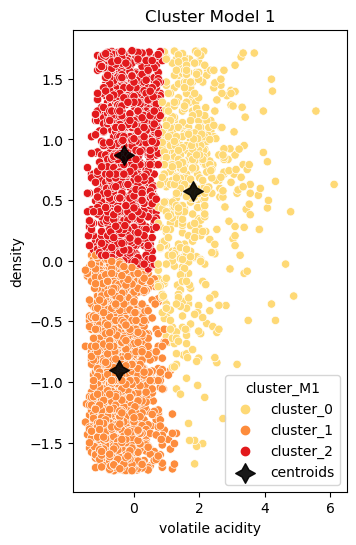

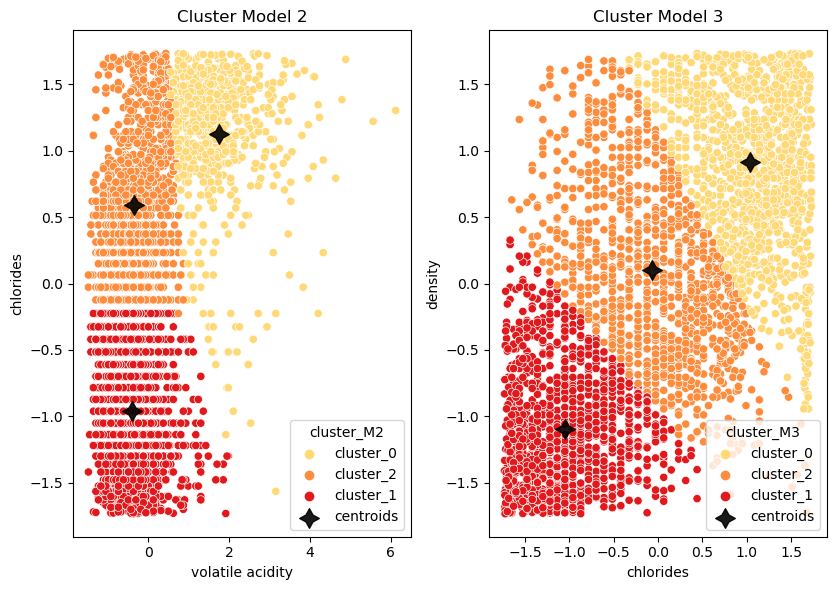

In [65]:
wine_train, X_scaled, scaler, kmeans, centroids1, centroids2, centroids3 = create_cluster_models(wine_train, X_scaled, 3)


In [66]:
X_scaled.head()

volatile acidity   density  chlorides cluster_M1 cluster_M2 cluster_M3
0          2.229825  0.883356   0.970976  cluster_0  cluster_0  cluster_0
1         -0.734706 -0.639621   0.149079  cluster_1  cluster_2  cluster_2
2         -0.796467 -0.403387  -1.050821  cluster_1  cluster_1  cluster_1
3          0.994604  0.610107   1.194656  cluster_0  cluster_0  cluster_0
4         -0.055335  1.528769   0.905085  cluster_2  cluster_2  cluster_0

In [67]:
wine_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
762             8.8              0.70         0.00             1.7   0.780280   
2844            8.0              0.22         0.31             5.6   0.543043   
3899            6.0              0.21         0.30             8.7   0.196697   
1019            7.0              0.50         0.14             1.8   0.844845   
3951            6.3              0.33         0.20            17.9   0.761261   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
762                   8.0                  19.0  0.755077  3.31       0.53   
2844                 24.0                  97.0  0.315315  3.10       0.42   
3899                 47.0                 127.0  0.383528  3.18       0.39   
1019                 10.0                  23.0  0.676176  3.53       0.61   
3951                 36.0                 161.0  0.941441  3.14       0.51   

       alcohol  quality  Yes_white  
762   0.421421        6        0.0  
2844  0.655155        5        1.0  
3899  0.588088        5        1.0  
1019  0.526026        5        0.0  
3951  0.028028        5        1.0

### <Span style= 'color: #800020'> Cluster Summary 
We felt cluster analysis did not provide distinct enough clusters for purposes of using in a regression model. Conduct DBSCAN cluster analysis because this method eliminates outliers, this may prove more useful in defining unique clusters of values
    

## <Span style= 'color: #800020'> Regression Modeling

will be completed by Derek Bixby

TypeError: lmplot() got an unexpected keyword argument 'ax'

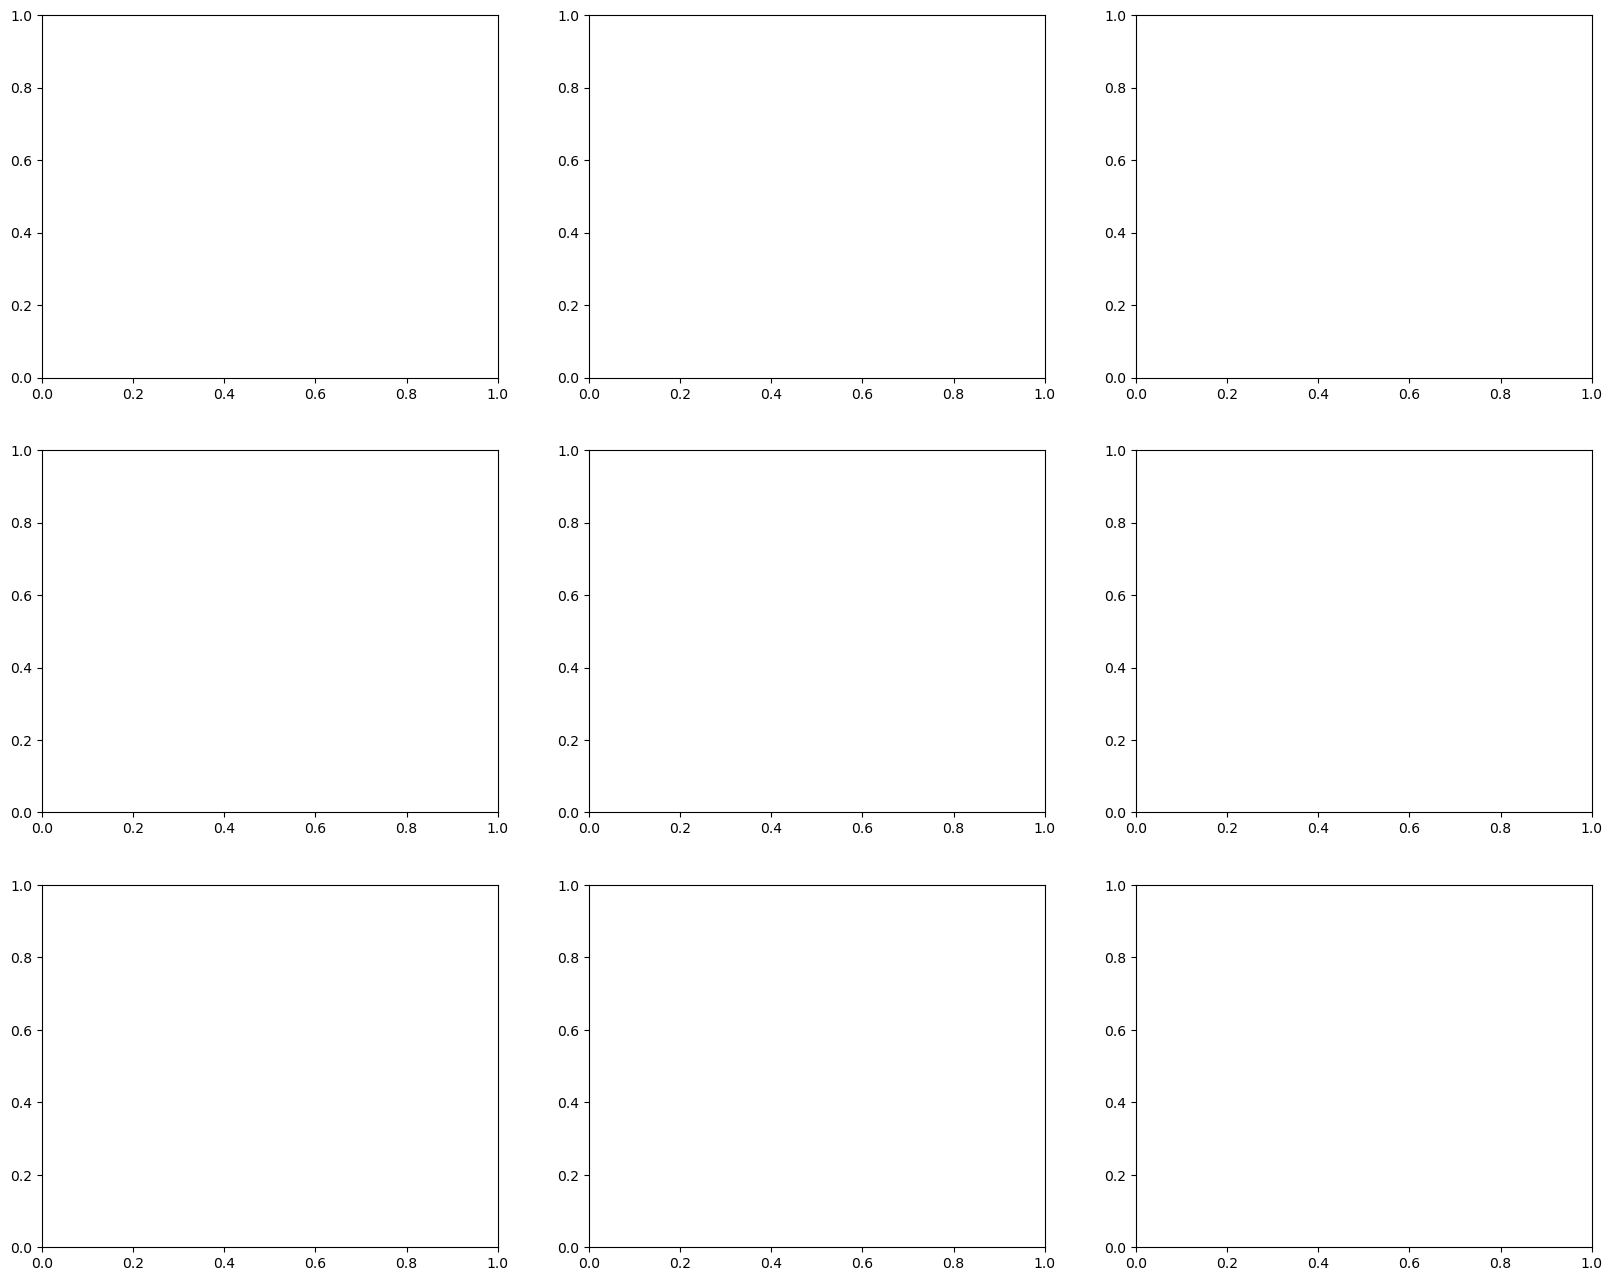

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_variable_pairs(df):
    
# Try this one#
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',   
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
    target = 'quality'

    # Calculate the number of rows and columns for the subplots
    num_rows = 3
    num_cols = 3

    # Create a subplot structure with 3 rows and 3 columns and adjust the figure size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))

    # Use sns.scatterplot to plot scatter plots for each variable against the target variable
    for i, col in enumerate(cols):
        row = i // num_cols
        col = i % num_cols
        sns.scatterplot(data=df, x=col, y=target, ax=axes[row, col])
        axes[row, col].set_xlabel(col)
        axes[row, col].set_ylabel(target)

    plt.tight_layout()
    plt.show()

# Assuming you have imported and defined the DataFrame 'wine_train'
plot_variable_pairs()
